# HR Analytics Project- Understanding the Attrition in HR
### Problem Statement:
- Every year a lot of companies hire a number of employees. The companies invest time and money in training those employees, not just this but there are training programs within the companies for their existing employees as well. The aim of these programs is to increase the effectiveness of their employees. But where HR Analytics fit in this? and is it just about improving the performance of employees?

### HR Analytics

- Human resource analytics (HR analytics) is an area in the field of analytics that refers to applying analytic processes to the human resource department of an organization in the hope of improving employee performance and therefore getting a better return on investment. HR analytics does not just deal with gathering data on employee efficiency. Instead, it aims to provide insight into each process by gathering data and then using it to make relevant decisions about how to improve these processes.

### Attrition in HR

- Attrition in human resources refers to the gradual loss of employees overtime. In general, relatively high attrition is problematic for companies. HR professionals often assume a leadership role in designing company compensation programs, work culture, and motivation systems that help the organization retain top employees.

- How does Attrition affect companies? and how does HR Analytics help in analyzing attrition? We will discuss the first question here and for the second question, we will write the code and try to understand the process step by step.

### Attrition affecting Companies

- A major problem in high employee attrition is its cost to an organization. Job postings, hiring processes, paperwork, and new hire training are some of the common expenses of losing employees and replacing them. Additionally, regular employee turnover prohibits your organization from increasing its collective knowledge base and experience over time. This is especially concerning if your business is customer-facing, as customers often prefer to interact with familiar people. Errors and issues are more likely if you constantly have new workers.

# Importing Libraries

In [3]:
import numpy as np
import pandas as pd
from numpy import median
from scipy import stats
%matplotlib inline
import scipy
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from pylab import rcParams  # for plotting box plot, to check outliers
warnings.filterwarnings('ignore')
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler  # for scaling

pd.pandas.set_option('display.max_columns',None)  # To display, all columns

In [4]:
#model developemnt libraries
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC, LinearSVC
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score,roc_curve,roc_auc_score
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier,AdaBoostClassifier

In [5]:
df = pd.read_csv('WA_Fn-UseC_-HR-Employee-Attrition.csv')

In [6]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


In [7]:
df.tail()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,3,Male,41,4,2,Laboratory Technician,4,Married,2571,12290,4,Y,No,17,3,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,4,Male,42,2,3,Healthcare Representative,1,Married,9991,21457,4,Y,No,15,3,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,2,Male,87,4,2,Manufacturing Director,2,Married,6142,5174,1,Y,Yes,20,4,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,4,Male,63,2,2,Sales Executive,2,Married,5390,13243,2,Y,No,14,3,4,80,0,17,3,2,9,6,0,8
1469,34,No,Travel_Rarely,628,Research & Development,8,3,Medical,1,2068,2,Male,82,4,2,Laboratory Technician,3,Married,4404,10228,2,Y,No,12,3,1,80,0,6,3,4,4,3,1,2


In [8]:
df.sample(5)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
1353,34,Yes,Non-Travel,967,Research & Development,16,4,Technical Degree,1,1905,4,Male,85,1,1,Research Scientist,1,Married,2307,14460,1,Y,Yes,23,4,2,80,1,5,2,3,5,2,3,0
1304,40,No,Travel_Rarely,750,Research & Development,12,3,Life Sciences,1,1829,2,Female,47,3,2,Healthcare Representative,1,Divorced,4448,10748,2,Y,No,12,3,2,80,1,15,3,3,7,4,7,7
882,36,No,Travel_Rarely,363,Research & Development,1,3,Technical Degree,1,1237,3,Female,77,1,3,Manufacturing Director,1,Divorced,10252,4235,2,Y,Yes,21,4,3,80,1,17,2,3,7,7,7,7
934,25,No,Travel_Rarely,266,Research & Development,1,3,Medical,1,1303,4,Female,40,3,1,Research Scientist,2,Single,2096,18830,1,Y,No,18,3,4,80,0,2,3,2,2,2,2,1
940,39,Yes,Travel_Rarely,360,Research & Development,23,3,Medical,1,1310,3,Male,93,3,1,Research Scientist,1,Single,3904,22154,0,Y,No,13,3,1,80,0,6,2,3,5,2,0,3


In [9]:
df.shape

(1470, 35)

## Observation:
    There are 1470 column and 35 rows.        

# Checking DataTYpe

In [10]:
df.dtypes

Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears   

In [11]:
numerical_data = [feature for feature in df.columns if df[feature].dtype != 'O']
print('Total Numerical Features are = ',len(numerical_data))

Total Numerical Features are =  26


In [12]:
categorical_data = [feature for feature in df.columns if df[feature].dtype == 'O']
print('Total Categorical Features are = ',len(categorical_data))

Total Categorical Features are =  9


## Conclusion -
- It is clear that there are 26 Numerical Features
- There are 9 categorical feature

Checking Duplicates Value

In [13]:
df.shape

(1470, 35)

In [14]:
df.drop_duplicates(inplace=True)

In [15]:
df.shape

(1470, 35)

## Conclusion -
- There are no duplicates in our data set, as there are 1470 unique names.

## Five number summery for Numerical Data

In [16]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,1470.0,36.923810,9.135373,18.0,30.00,36.0,43.00,60.0
DailyRate,1470.0,802.485714,403.509100,102.0,465.00,802.0,1157.00,1499.0
DistanceFromHome,1470.0,9.192517,8.106864,1.0,2.00,7.0,14.00,29.0
Education,1470.0,2.912925,1.024165,1.0,2.00,3.0,4.00,5.0
EmployeeCount,1470.0,1.000000,0.000000,1.0,1.00,1.0,1.00,1.0
EmployeeNumber,1470.0,1024.865306,602.024335,1.0,491.25,1020.5,1555.75,2068.0
EnvironmentSatisfaction,1470.0,2.721769,1.093082,1.0,2.00,3.0,4.00,4.0
HourlyRate,1470.0,65.891156,20.329428,30.0,48.00,66.0,83.75,100.0
JobInvolvement,1470.0,2.729932,0.711561,1.0,2.00,3.0,3.00,4.0
JobLevel,1470.0,2.063946,1.106940,1.0,1.00,2.0,3.00,5.0


## Conclusion -
- Age :The minimum age of the employee is 18 and maximum is 60
- DailyRate:A day rate is the billing cost for an individual's services for a single day
- DistanceFromHome:There are 75 % employess whose distance from company is more and only 25% peoppl are nearly to the company
- EmployeeNumber:There are 2068 employee working in the company

In [17]:
df.describe(include="O")

,Attrition,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,Over18,OverTime
count,1470,1470,1470,1470,1470,1470,1470,1470,1470
unique,2,3,3,6,2,9,3,1,2
top,No,Travel_Rarely,Research & Development,Life Sciences,Male,Sales Executive,Married,Y,No
freq,1233,1043,961,606,882,326,673,1470,1054


## Conclusion -
- Based on above data, we can say that

- For Attrition column - There are 1233 Employee who are leaving and rest of the people are stayed
- We get unique feature count for each feature
- Total 961 employee were worked with  oResearch & Development
- The attrition rate for male employee around 882 outof 1470
- Less than 50% married employee are depart
- There are 1050 employee who worked overtime 


## Checking missing values

In [18]:
# Checking number of missing values
df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [19]:
# Checking total number of missing values
df.isnull().sum().sum()

0

# Exporatory Data Analysis

### Checking Data Distribuion

array([[<AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'DailyRate'}>,
        <AxesSubplot:title={'center':'DistanceFromHome'}>,
        <AxesSubplot:title={'center':'Education'}>,
        <AxesSubplot:title={'center':'EmployeeCount'}>],
       [<AxesSubplot:title={'center':'EmployeeNumber'}>,
        <AxesSubplot:title={'center':'EnvironmentSatisfaction'}>,
        <AxesSubplot:title={'center':'HourlyRate'}>,
        <AxesSubplot:title={'center':'JobInvolvement'}>,
        <AxesSubplot:title={'center':'JobLevel'}>],
       [<AxesSubplot:title={'center':'JobSatisfaction'}>,
        <AxesSubplot:title={'center':'MonthlyIncome'}>,
        <AxesSubplot:title={'center':'MonthlyRate'}>,
        <AxesSubplot:title={'center':'NumCompaniesWorked'}>,
        <AxesSubplot:title={'center':'PercentSalaryHike'}>],
       [<AxesSubplot:title={'center':'PerformanceRating'}>,
        <AxesSubplot:title={'center':'RelationshipSatisfaction'}>,
        <AxesSubplot:title={'cen

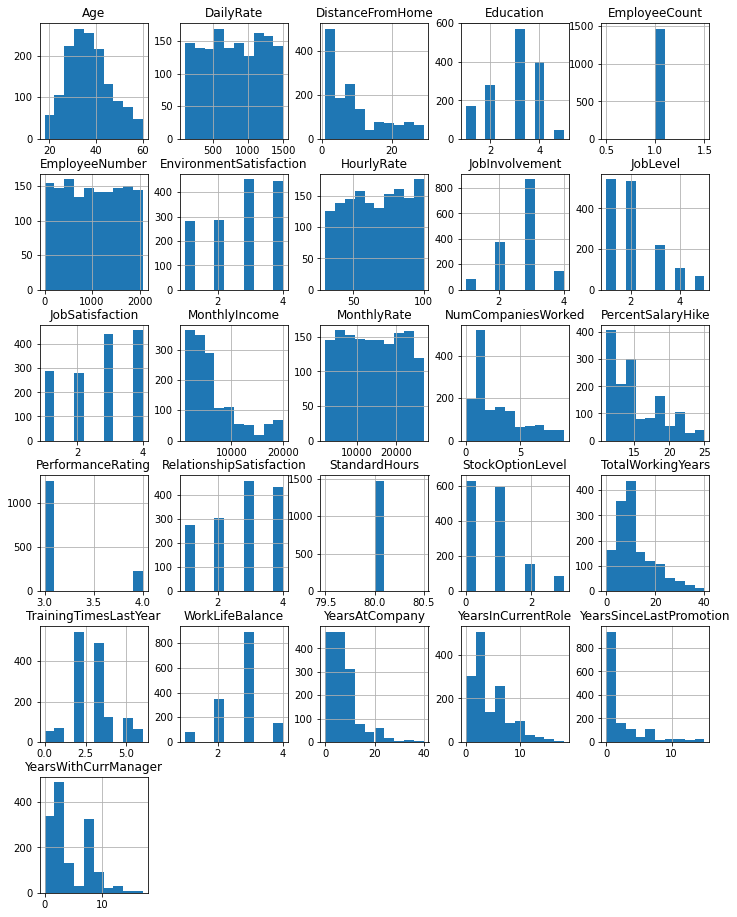

In [20]:
df.hist(figsize=(12,16))

# Checking Independent Features with target features

## Age

In [21]:
# Reassign response variable
df['Attrition'] = df['Attrition'].apply(lambda x: 0 if x == 'No' else 1)

In [22]:
# Drop useless features and rename the dataframe
df2 = df.drop(labels = ['Over18','StandardHours','EmployeeCount'], axis = 1)

In [23]:
# Moving Response Variable to the last column
front = df2['Attrition']
df2.drop(labels=['Attrition'], axis=1,inplace=True)
df2.insert(31,'Attrition',front)

In [24]:
# Changing object types to categories
cols = ['BusinessTravel','Department','EducationField','Gender','JobRole','MaritalStatus','OverTime']
for col in cols:
    df2[col] = df2[col].astype('category')

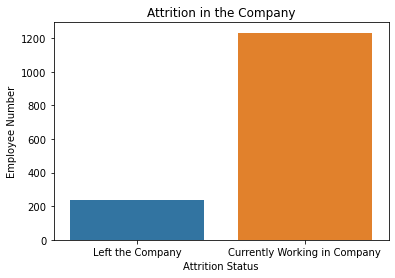

Currently Working in Company    1233
Left the Company                 237
Name: Attrition, dtype: int64

In [25]:
trgt = df2['Attrition'].apply(lambda x: 'Currently Working in Company' if x == 0 else 'Left the Company')
sns.countplot(trgt)
plt.title('Attrition in the Company')
plt.xlabel('Attrition Status')
plt.ylabel('Employee Number')
plt.show()
trgt.value_counts()

## Observation:
- There are 1470 employees.
- 237 employees who compose 16% of the total number of employee left the company for some reasons.
- 1233 employee is currently continuing to work in the same company.

## Features:

In [26]:
# Create Feature Dataframe
def table_df(x): 
    """
    This function creates dataframe for each feature in the dataset
    """
    
    feature = df2.groupby(x).agg({'Attrition':['size', 'sum', 'mean']})
    feature.columns = [' '.join(col).strip() for col in feature.columns.values]
    feature = feature.reset_index()
    feature['Attrition mean'] = feature['Attrition mean']*100
    feature.columns = [x, 'Total Employee ', 'Attrition Number', 
                       '% of Attrition in the Relevant Group'] 
    feature['% of Attrition in the Company'] = (feature['Attrition Number'] / 237)*100
        
    return feature

In [27]:
# Create graph for each feature to compare its attrition in the company 

def graph_df(x, y = 'bar', z = 0):
    """
    This function creates graph for each feature in the dataset
    """
    
    feature = df2.groupby(x).agg({'Attrition':['size', 'sum', 'mean']})
    feature.columns = [' '.join(col).strip() for col in feature.columns.values]
    feature = feature.reset_index()
    feature['Attrition mean'] = feature['Attrition mean']*100
    feature.columns = [x, 'Total Employee', 'Attrition Number', 
                       '% of Attrition in the Relevant Group'] 
    
    fig0, ax1 = plt.subplots()
    ax2 = ax1.twinx()
    feature.set_index(feature[x], drop=True, inplace=True)
    feature['Total Employee'].plot(kind = y, stacked = True, ax = ax1, 
                                   colormap = 'winter', rot = z)
    feature['% of Attrition in the Relevant Group'].plot(use_index = False, 
                                                         kind = 'line', ax = ax2, colormap='Spectral')
    plt.title('Attrition compared to' + " " + x  + " " + "Groups")
    ax1.set_xlabel(x)
    ax1.yaxis.label.set_color('blue')
    ax1.set_ylabel("Total Employee")
    ax2.set_ylabel("Attrition Percentage in the Relevant Group")
    ax2.yaxis.label.set_color('red')
    plt.tight_layout()
    plt.show()

## Age

In [28]:
# Age Group & Attrition Table
table_df(x = 'Age')

,Age,Total Employee,Attrition Number,% of Attrition in the Relevant Group,% of Attrition in the Company
0,18,8,4,50.000000,1.687764
1,19,9,6,66.666667,2.531646
2,20,11,6,54.545455,2.531646
3,21,13,6,46.153846,2.531646
4,22,16,5,31.250000,2.109705
5,23,14,4,28.571429,1.687764
6,24,26,7,26.923077,2.953586
7,25,26,6,23.076923,2.531646
8,26,39,12,30.769231,5.063291
9,27,48,3,6.250000,1.265823


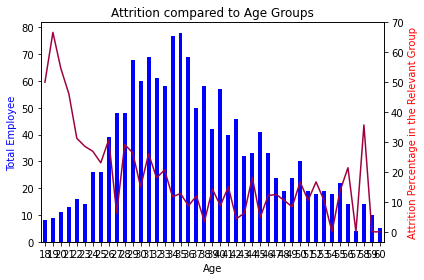

In [29]:
# Attrition Compared to Age Group Graph
graph_df(x = 'Age')

# Observation -
- In 18-21 age group, young employees are more likely to leave the company. Their attrition proportion to their age group is approximately 53.7% (22 out of 41) and that makes up 9% of all attrition (22 out of 237).

- If we evaluate overall attrition number in the company, 26-35 age group's attrition number is the highest comparing to other age groups. In this age group, we have 19.1 % of employee attrition(116 out 606). That makes up approximately 49% of all attrition in the company (116 out of 237).

- 35-60 age group generally prefers to secure their job in the same company.

## Business Travel

Text(0.5, 1.0, 'Effect of Age on BusinessTravel')

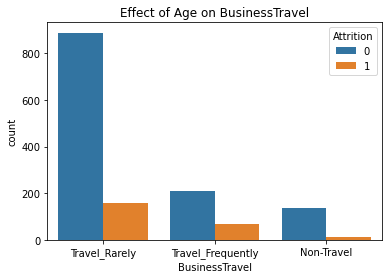

In [30]:
# Common Plot
sns.countplot(x='BusinessTravel',hue='Attrition', data= df)
plt.title('Effect of Age on BusinessTravel')

In [31]:
# Business Travel & Attrition Table
table_df(x = 'BusinessTravel')

,BusinessTravel,Total Employee,Attrition Number,% of Attrition in the Relevant Group,% of Attrition in the Company
0,Non-Travel,150,12,8.000000,5.063291
1,Travel_Frequently,277,69,24.909747,29.113924
2,Travel_Rarely,1043,156,14.956855,65.822785


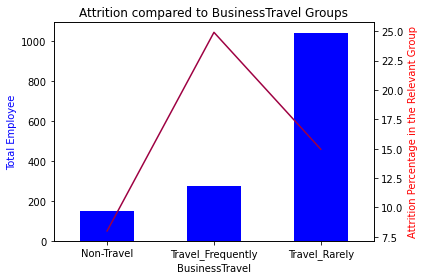

In [32]:
# Attrition compared to Business Travel Group Graph
graph_df(x = 'BusinessTravel')

## Observation:
    
- In the company, most of the employee travel rarely or don't travel according to their job description. That group compose the 81.1% of entire company(1193). The rest of the company employees which is 19.9% of them has to travel frequently (277 out of 1470).

- The highest attrition number with 156 belongs to the employees who travels rarely. That is approximately 15% of employees in that group (156 out of 1043). But when you put this number overall attrition, it makes up 65.8% of all attrition in the company(156 out of 237).

- if we look at the attrition percentage of relevant travel group, the employees who are traveling frequently are in the danger zone. Because they have the highest attrition proportion, which is 24.9%, in their individual travel group(69 out of 277). That group's attrition rate composes of the 29.1% of overall attrition in the company (69 out of 237).

- Employees who don't travel in their current role have the lowest attrition rate, which is 8%.

# Department

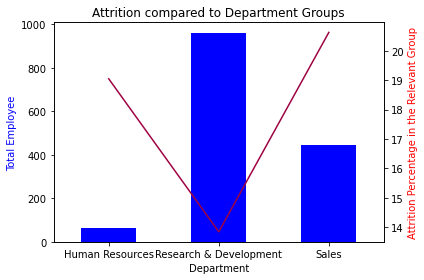

In [33]:
graph_df(x = 'Department')

# Observation:

- There are three departments in the company. Research & Development Department has the most attrition number in the company. 13.8% of Research & Development Department employee left the organization. In numbers, it is equal to 133, which makes us the 56.1% of all attrition in the company. Actually, that attrition is a big number for company, but compared with other departments, Research & Development Department has the lowest attrition rate in itself as an individual department.

- Sales Department has mostly been affected by the attrition. Because 20.6% of its employees left the organization. This is the highest number compared to the other two departments. That attrition makes up 38.8% of the attrition in the company (92 out of 237).

- Human Resources Department follows the Sales Department in terms of being affected by attrition itself. 19% of that department employee left the company. But this is not that huge number in terms of whole attrition in company. Human Resources Department employee attrition makes up 5% of all attrition in the company (12 out of 237).

Text(0.5, 1.0, 'Effect of Attrition on Department')

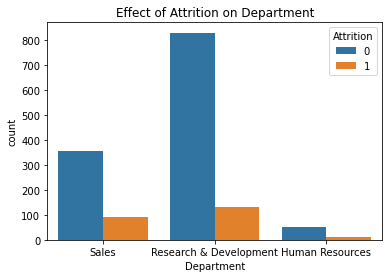

In [34]:
# Common Plot
sns.countplot(x='Department',hue='Attrition', data= df)
plt.title('Effect of Attrition on Department')

# Distance From Home

In [35]:
# Labeling Distance From Home Groups
table_df(x = 'DistanceFromHome')
bins = [0, 3, 6, 10, 29]
group_names = ['1-3', '4-6', '7-10', '10+']
df2['DistanceFromHome'] = pd.cut(df2['DistanceFromHome'], bins, labels = group_names)

In [36]:
# Distance From Home Group & Attrition Table
table_df(x = 'DistanceFromHome')

,DistanceFromHome,Total Employee,Attrition Number,% of Attrition in the Relevant Group,% of Attrition in the Company
0,1-3,503,68,13.518887,28.691983
1,4-6,188,26,13.829787,10.970464
2,7-10,335,50,14.925373,21.097046
3,10+,444,93,20.945946,39.240506


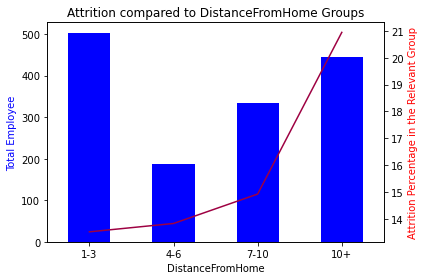

In [37]:
# Attrition compared to Distance From Home Graph
graph_df(x = 'DistanceFromHome')

## Observation:

- Employees whose homes are 1-3 miles far away from the company compose approximately 1/3 of the whole company employee and their attrition rate is 28.7% of all company (68 out of 237).

- Also, employees whose homes are 10+ miles far away from the company compose approximately the other 1/3 of the whole company employee and their attrition rate is 39.2% of all company (93 out of 237).

- 
Attrition rate within its own distance group seems to increase as the distance from home increases.



# Education

In [38]:
# Labeling education levels
table_df(x = 'Education')
df2['Education'] = df2['Education'].map({1:'Below College', 2:'College', 
                                         3:'Bachelor', 4:'Master', 5:'Doctor'})

In [39]:
# Education Level & Attrition Table
table_df(x = 'Education')

,Education,Total Employee,Attrition Number,% of Attrition in the Relevant Group,% of Attrition in the Company
0,Bachelor,572,99,17.307692,41.772152
1,Below College,170,31,18.235294,13.080169
2,College,282,44,15.602837,18.565401
3,Doctor,48,5,10.416667,2.109705
4,Master,398,58,14.572864,24.472574


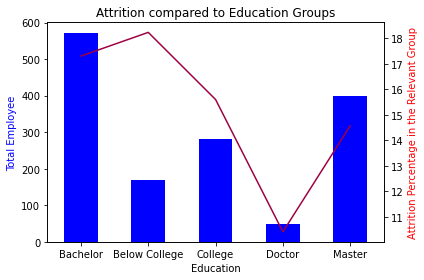

In [40]:
# Attrition compared to Education Level Graph
graph_df(x = 'Education')

# Observation:

- Employees who have bachelor degree have the most attrition number (99 employees) in the company. That makes up 41.8% of all attrition in the company. Employees who have Ph.D. degree composes the least attrition number in the company.

- Employees who have the master, college, and below college degrees are follower of employees who have bachelor degrees in terms of the attrition number in the company respectively.

# EducationField

In [41]:
# Education Field & Attrition Table
table_df(x = 'EducationField')




,EducationField,Total Employee,Attrition Number,% of Attrition in the Relevant Group,% of Attrition in the Company
0,Human Resources,27,7,25.925926,2.953586
1,Life Sciences,606,89,14.686469,37.552743
2,Marketing,159,35,22.012579,14.767932
3,Medical,464,63,13.577586,26.582278
4,Other,82,11,13.414634,4.641350
5,Technical Degree,132,32,24.242424,13.502110


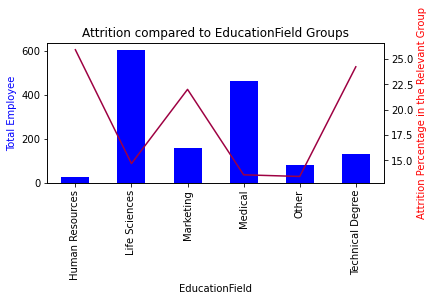

In [42]:


# Attrition compared to Education Field Graph
graph_df(x = 'EducationField', z = 90)

# Environment Satisfaction

In [43]:
# Labeling environment satisfaction
table_df(x = 'EnvironmentSatisfaction')
df2['EnvironmentSatisfaction'] = df2['EnvironmentSatisfaction'].map({1:'Low', 2:'Medium', 
                                                                     3:'High', 4:'Very High'})

In [44]:
# Environment & Attrition Table
table_df(x = 'EnvironmentSatisfaction')

,EnvironmentSatisfaction,Total Employee,Attrition Number,% of Attrition in the Relevant Group,% of Attrition in the Company
0,High,453,62,13.686534,26.160338
1,Low,284,72,25.352113,30.379747
2,Medium,287,43,14.982578,18.143460
3,Very High,446,60,13.452915,25.316456


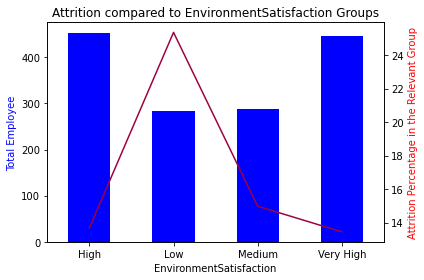

In [45]:
# Attrition compared to Environment Satisfaction Graph
graph_df(x = 'EnvironmentSatisfaction')



# Observation:

- As it may be expected, there is a high attrition rate in the low satisfaction environment. That composes the 30.4 % of the whole company's attrition.

- Shockingly, in the high and very high satisfaction environment, there are still 13.7 % of the these each group's employees leave the company. That attrition composes of the 51.5 % of the whole company's attrition. This result might tell us that environment satisfaction is not the one of the main reasons for attrition in the company.

# Gender

In [46]:
# Gender & Attrition Table
table_df(x = 'Gender')

,Gender,Total Employee,Attrition Number,% of Attrition in the Relevant Group,% of Attrition in the Company
0,Female,588,87,14.795918,36.708861
1,Male,882,150,17.006803,63.291139


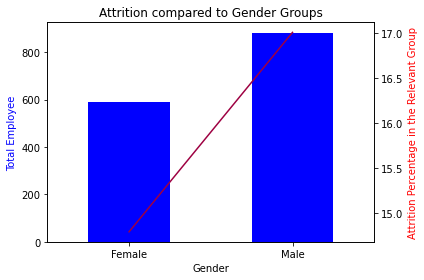

In [47]:
# Attrition compared to Gender Graph
graph_df(x = 'Gender')

## Observation:
Male employees are more likely to leave the company than female employees.

# Job Involvement

In [48]:
# Labeling Job Involvement Groups
table_df(x = 'JobInvolvement')
df2['JobInvolvement'] = df2['JobInvolvement'].map({1:'Low', 2:'Medium', 
                                                   3:'High', 4:'Very High'})

In [49]:
# Job Involvement & Attrition Table
table_df(x = 'JobInvolvement')

,JobInvolvement,Total Employee,Attrition Number,% of Attrition in the Relevant Group,% of Attrition in the Company
0,High,868,125,14.400922,52.742616
1,Low,83,28,33.734940,11.814346
2,Medium,375,71,18.933333,29.957806
3,Very High,144,13,9.027778,5.485232


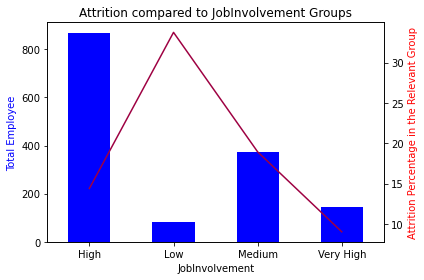

In [50]:
# Attrition compared to Job Involvement Graph
graph_df(x = 'JobInvolvement')

# Observation:
- 59% of all employee's job involvement in the company is in the high category(868 out of 1470). The highest attrition number is also observed in high job involvement category. 125 employees in this group, which composes the 52.7% of all attrition, left the company. But that is only 14.4% of high job involvement category.

- Medium job involvement category is following the high category group in attrition number with 71 employee.

- Low job involvement category has the highest employee leaving proportion within individual category when it is compared to the other categories. 33.7% of Low Job involvement group left the company.

# Job Level

In [51]:
# Labeling job levels
table_df(x = 'JobLevel')
df2['JobLevel'] = df2['JobLevel'].map({1:'Level-1', 2:'Level-2', 
                                       3:'Level-3', 4:'Level-4', 5:'Level-5'})

In [52]:
# Job Level & Attrition Table
table_df(x = 'JobLevel')

,JobLevel,Total Employee,Attrition Number,% of Attrition in the Relevant Group,% of Attrition in the Company
0,Level-1,543,143,26.335175,60.337553
1,Level-2,534,52,9.737828,21.940928
2,Level-3,218,32,14.678899,13.502110
3,Level-4,106,5,4.716981,2.109705
4,Level-5,69,5,7.246377,2.109705


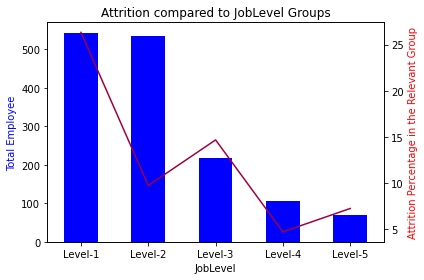

In [53]:
# Attrition compared to Job Level Graph
graph_df(x = 'JobLevel')

# Observation:
- With an increase in job level, there is a decrease in attrition number throughout the company. The highest attrition is observed in the job level-1. 143 employees in the job level-1, who compose the 60.3% of all attrition, left the company.

# Job Role

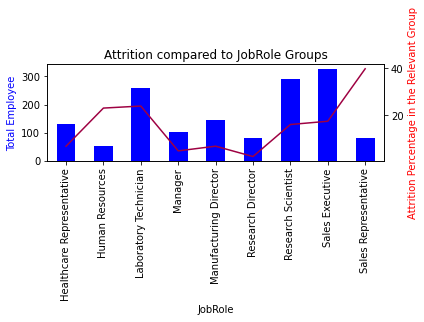

In [54]:
# Attrition compared to Job Role Graph
graph_df(x = 'JobRole', z = 90)

# Observation:
- Laboratory Technician has the most attrition number with the 26.2% of all attrition in the company (62 out of 237 employees). Sales Executive and Research Scientist are following the Laboratory Technician in attrition throughout the company with the 57 and 47 employees respectively. Those both job roles' attrition composes 44% of whole company's attrition.

- Sales Representative role has been affected mostly by the attrition. Sales Representative has lost approximately 40% of its' employee. Laboratory Technician and Human Resources followed it in terms of losing employee as a job role.

- On the other hand, Research Director job role has the lowest attrition number not only in the company (2.5%) but only within its own job role(0.8%).

# Job Satisfaction

In [55]:
# Labeling Job Role 
table_df(x = 'JobSatisfaction')
df2['JobSatisfaction'] = df2['JobSatisfaction'].map({1:'Low', 2:'Medium',
                                                     3:'High', 4:'Very High'})  

In [56]:
# Job Satisfaction & Attrition Table
table_df(x = 'JobSatisfaction')

,JobSatisfaction,Total Employee,Attrition Number,% of Attrition in the Relevant Group,% of Attrition in the Company
0,High,442,73,16.515837,30.801688
1,Low,289,66,22.837370,27.848101
2,Medium,280,46,16.428571,19.409283
3,Very High,459,52,11.328976,21.940928


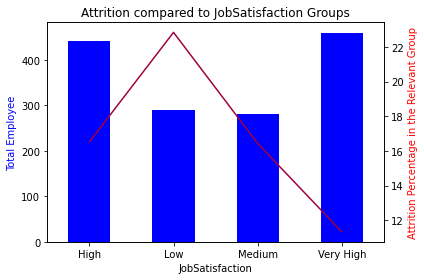

In [57]:

# Attrition compared to Job Satisfaction
graph_df(x = 'JobSatisfaction')

# Observation:

- In high job satisfaction, surprisingly employees leave the company most and their attrition composes 30.8% of company's attrition. From this picture, I assume that job satisfaction should not be the main reason for employees to leave the company.

- As it may be expected, in low job satisfaction, employees leave the company more than other groups except high satisfaction. They compose 27.8% of all attrition in the company.

# Marital Status

In [58]:
# Job Satisfaction & Attrition Table
table_df(x = 'MaritalStatus')

,MaritalStatus,Total Employee,Attrition Number,% of Attrition in the Relevant Group,% of Attrition in the Company
0,Divorced,327,33,10.091743,13.924051
1,Married,673,84,12.481426,35.443038
2,Single,470,120,25.531915,50.632911


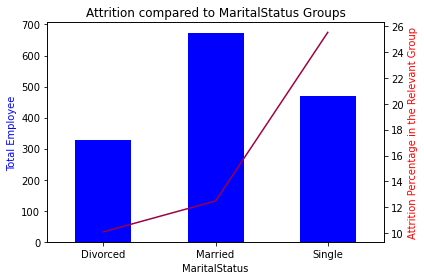

In [59]:
# Attrition compared to Job Satisfaction
graph_df(x = 'MaritalStatus')

# Observation:
- Single employees are more likely to leave the company. They have the highest attrition number and compose of the 50.6% employees who left the company. Married and Divorced employees are the followers of Single employees in the attrition number of the company respectively.

# Monthly Income

In [60]:
# Labeling Monthly Income Level
table_df(x = "MonthlyIncome")
bins = [1000, 2000, 3000, 4000, 5000, 7500, 9000, 11000, 15000, 20000]
group_names = ['1000-2000', '2000-3000', '3000-4000', '4000-5000', '5000-7500', 
               '7500-9000', '9000-11000', '11000-15000', '15000-20000']             
df2["MonthlyIncome"] = pd.cut(df2["MonthlyIncome"], bins, labels = group_names)

In [61]:
# Monthly Income & Attrition Table
table_df(x = "MonthlyIncome")

,MonthlyIncome,Total Employee,Attrition Number,% of Attrition in the Relevant Group,% of Attrition in the Company
0,1000-2000,33,18,54.545455,7.594937
1,2000-3000,362,95,26.243094,40.084388
2,3000-4000,148,24,16.216216,10.126582
3,4000-5000,206,26,12.621359,10.970464
4,5000-7500,310,30,9.677419,12.658228
5,7500-9000,78,10,12.820513,4.219409
6,9000-11000,118,22,18.644068,9.282700
7,11000-15000,82,7,8.536585,2.953586
8,15000-20000,133,5,3.759398,2.109705


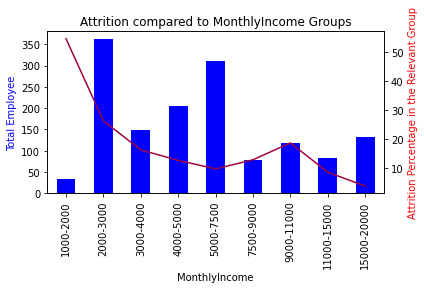

In [62]:
# Attrition compared to Monthly Income Level Graph
graph_df(x = "MonthlyIncome", z = 90)

# Observation:
- 2000-3000 dollars monthly income level, there is a high attrition and it compose the 40% of attrition in the company.

- 1000-2000 dollars monthly income level, there is a high attrition in its own income group level, which is 54.5%.

- As the monthly income increase, it is observed that there is a decrease in attrition. But, in 9000-11000 dollars monthly income level, there is a rise in attrition of its own monthly income group level.

# Number Companies Worked

In [63]:
# Labeling Numbers Companied Worked Groups
table_df(x = 'NumCompaniesWorked')
bins = [0, 1, 2, 3, 4, 5, 10]
group_names = ['0', '1', '2', '3', '4', '5+']             
df2['NumCompaniesWorked'] = pd.cut(df2['NumCompaniesWorked'], bins, labels = group_names, 
                                        include_lowest = True, right = False)

In [64]:
# Numbers Companied Worked & Attrition Table
table_df(x = 'NumCompaniesWorked')

,NumCompaniesWorked,Total Employee,Attrition Number,% of Attrition in the Relevant Group,% of Attrition in the Company
0,0,197,23,11.675127,9.704641
1,1,521,98,18.809981,41.350211
2,2,146,16,10.958904,6.751055
3,3,159,16,10.062893,6.751055
4,4,139,17,12.230216,7.172996
5,5+,308,67,21.753247,28.270042


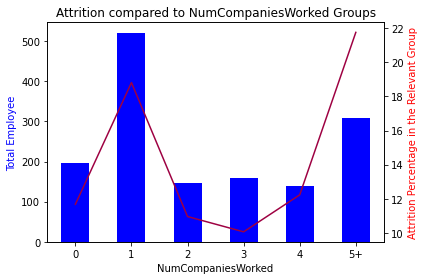

In [65]:

# Attrition compared to Numbers of Companies Worked Graph
graph_df(x = 'NumCompaniesWorked')

# Observation
- If employees have one company experience before current company, they are more likely to leave the company. They have the highest attrition number and compose of 41.3% all attrition in the company. Besides, if employees don't have any experience in other company, they have the second most attrition number.

- Also, employees, who has more experience such as working in 5,6,7, and 9 companies before the current company, have the highest attrition in their individual experienced group.

# Over Time

In [66]:
# Numbers Companied Worked & Attrition Table
table_df(x = 'OverTime')

,OverTime,Total Employee,Attrition Number,% of Attrition in the Relevant Group,% of Attrition in the Company
0,No,1054,110,10.436433,46.413502
1,Yes,416,127,30.528846,53.586498


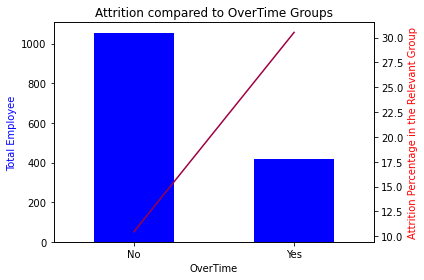

In [67]:
# Attrition compared to Numbers of Companies Worked Graph
graph_df(x = 'OverTime')

# Observation
- 28.3% of employees have the over time work in the company and they have higher attrition number than employees who don't have. There is not a significant difference between these two groups' attrition number. But if you compare individually both groups, over time employees are much more likely to leave the company.

# Percent Salary Hike

In [68]:
# Percent Salary Hike & Attrition Table
table_df(x = 'PercentSalaryHike')
bins = [10, 14, 18, 22, 25]
group_names = ['11-14', '15-18', '19-22', '23-25']             
df2['PercentSalaryHike'] = pd.cut(df2['PercentSalaryHike'], bins, labels = group_names)

In [69]:
# Percent Salary Hike & Attrition Table
table_df(x = 'PercentSalaryHike')

,PercentSalaryHike,Total Employee,Attrition Number,% of Attrition in the Relevant Group,% of Attrition in the Company
0,11-14,818,132,16.136919,55.696203
1,15-18,350,59,16.857143,24.894515
2,19-22,235,33,14.042553,13.924051
3,23-25,67,13,19.402985,5.485232


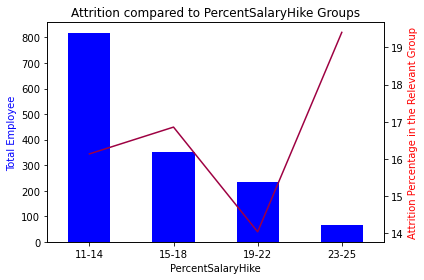

In [70]:
# Attrition compared to Percent Salary Hike
graph_df(x = 'PercentSalaryHike')

# Observation
- As it may be expected, the higher percent salary hike is, the more employees are likely and willingly to stay in the current company. The employees who have the highest percent salary hikes are more likely to leave the company. The reason for that might be due to the fact that they are more qualified and have the chance to find better position in other companies or due to the retirement.

# Performance Rating

In [71]:
# Performance Rating & Attrition Table
table_df(x = 'PerformanceRating')


,PerformanceRating,Total Employee,Attrition Number,% of Attrition in the Relevant Group,% of Attrition in the Company
0,3,1244,200,16.077170,84.388186
1,4,226,37,16.371681,15.611814


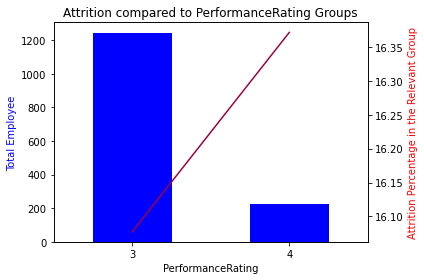

In [72]:
# Attrition compared to Performance Rating
graph_df(x = 'PerformanceRating')

# Observation
- 
Performance rating has two category such as 3 and 4. 84.6% of employees are in the performance rating 3 group and 16.08 attrition. The rest of the employees are in performance rating 4 group and their attrition percentage(%16.37) is a little bit higher than previous group.

# Relationship Satisfaction

In [73]:
# Labeling Relationship Satisfaction Levels
table_df(x = 'RelationshipSatisfaction')
df2['RelationshipSatisfaction'] = df2['RelationshipSatisfaction'].map({1:'Low', 2:'Medium', 
                                                                       3:'High', 4:'Very High'})

In [74]:
# Relationship & Attrition Table
table_df(x = 'RelationshipSatisfaction')

,RelationshipSatisfaction,Total Employee,Attrition Number,% of Attrition in the Relevant Group,% of Attrition in the Company
0,High,459,71,15.468410,29.957806
1,Low,276,57,20.652174,24.050633
2,Medium,303,45,14.851485,18.987342
3,Very High,432,64,14.814815,27.004219


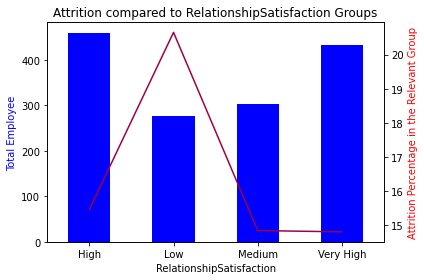

In [75]:

# Attrition compared to Relationship Satisfaction Graph
graph_df(x = 'RelationshipSatisfaction')

# Observation
- Relationship satisfaction is aligned with high and very high in the company. But, still High and very high relationship satisfaction level have the most attrition number respectively and compose of 52.7% all attrition in the company.

- Besides that, the highest attrition percentage in the satisfaction group is low as it might be expected (20.7% of attrition in the low relationship satisfaction level.

# Stock Option Level

In [76]:
# Relationship & Attrition Table
table_df(x = 'RelationshipSatisfaction')

,RelationshipSatisfaction,Total Employee,Attrition Number,% of Attrition in the Relevant Group,% of Attrition in the Company
0,High,459,71,15.468410,29.957806
1,Low,276,57,20.652174,24.050633
2,Medium,303,45,14.851485,18.987342
3,Very High,432,64,14.814815,27.004219


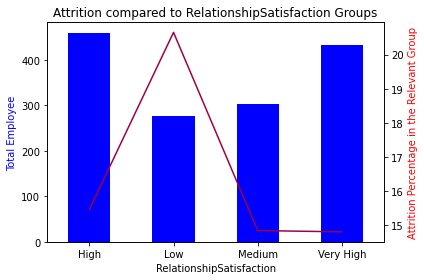

In [77]:
# Attrition compared to Relationship Satisfaction Graph
graph_df(x = 'RelationshipSatisfaction')

If stock option level is 0, there occurs a huge attrition in the company and it composes the 65% of the all attrition in the company. Besides, as the stock option level increase, there is a decrease in attrition number.

# Total Working Years

In [78]:
# Total Working Years & Attrition Table
table_df(x = 'TotalWorkingYears')
bins = [0, 1, 5, 10, 15, 20, 40]
group_names = ['1', '2-5', '6-10', '11-15', '16-20', '20+']             
df2['TotalWorkingYears'] = pd.cut(df2['TotalWorkingYears'], bins, labels = group_names, 
                                  include_lowest = True)

In [79]:
# Total Working Years & Attrition Table
table_df(x = 'TotalWorkingYears')

,TotalWorkingYears,Total Employee,Attrition Number,% of Attrition in the Relevant Group,% of Attrition in the Company
0,1,92,45,48.913043,18.987342
1,2-5,224,46,20.535714,19.409283
2,6-10,607,91,14.991763,38.396624
3,11-15,191,24,12.565445,10.126582
4,16-20,149,15,10.067114,6.329114
5,20+,207,16,7.729469,6.751055


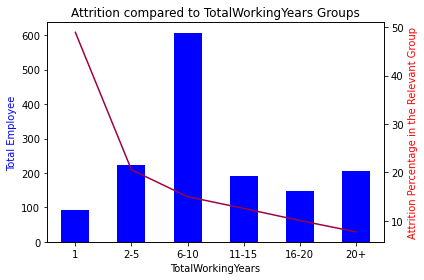

In [80]:
graph_df(x = 'TotalWorkingYears')

# Observation
- Employees who have one year or less working experience are more likely to leave the company and compose the 18.98% of all attrition throughout the company. In addition to that, employees who have 6-10 years' experience have also second highest attrition percentage throughout the company and it compose the 38.4% of all attrition.

# Training Times Last Year

In [81]:
# Training Times Last Year & Attrition Table
table_df(x = 'TrainingTimesLastYear')

,TrainingTimesLastYear,Total Employee,Attrition Number,% of Attrition in the Relevant Group,% of Attrition in the Company
0,0,54,15,27.777778,6.329114
1,1,71,9,12.676056,3.797468
2,2,547,98,17.915905,41.350211
3,3,491,69,14.052953,29.113924
4,4,123,26,21.138211,10.970464
5,5,119,14,11.764706,5.907173
6,6,65,6,9.230769,2.531646


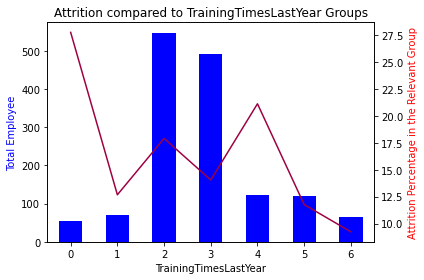

In [82]:
# Attrition compared to Training Times Last Year Graph
graph_df(x = 'TrainingTimesLastYear')

# Observation
- Employees who has 2 and 3 times training last year has the most attrition number respectively and both of their attrition compose the 70.5% of all attrition in the company. Employees who don't have training time beforehand has the highest attrition number in its individual group.

# Work Life Balance

In [83]:

# Labeling Work Life Balance Groups
table_df(x = 'WorkLifeBalance')
df2['WorkLifeBalance'] = df2['WorkLifeBalance'].map({1:'Bad', 2:'Good', 
                                                     3:'Better', 4:'Best'})

In [84]:
# Work Life Balance & Attrition Table
table_df(x = 'WorkLifeBalance')

,WorkLifeBalance,Total Employee,Attrition Number,% of Attrition in the Relevant Group,% of Attrition in the Company
0,Bad,80,25,31.250000,10.548523
1,Best,153,27,17.647059,11.392405
2,Better,893,127,14.221725,53.586498
3,Good,344,58,16.860465,24.472574


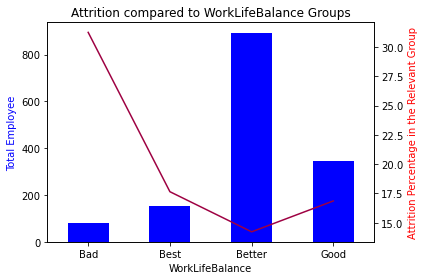

In [85]:
# Attrition compared to Work Life Balance Graph
graph_df(x = 'WorkLifeBalance')

# Observation
- In general, work life balance is satisfactorily good throughout the company. But we have the highest attrition number and percentage throughout the company.

- Besides, bad work life balance group has highest attrition percentage in its individual group.

# Years at Company

In [86]:
# Labeling Years at Company Groups
table_df(x = 'YearsAtCompany')
bins = [0, 1, 5, 10, 40]
group_names = ['1', '2-5', '6-10', '10+']             
df2['YearsAtCompany'] = pd.cut(df2['YearsAtCompany'], bins, labels = group_names, 
                               include_lowest = True)

In [87]:
# Years at Company & Attrition Table
table_df(x = 'YearsAtCompany')

,YearsAtCompany,Total Employee,Attrition Number,% of Attrition in the Relevant Group,% of Attrition in the Company
0,1,215,75,34.883721,31.645570
1,2-5,561,87,15.508021,36.708861
2,6-10,448,55,12.276786,23.206751
3,10+,246,20,8.130081,8.438819


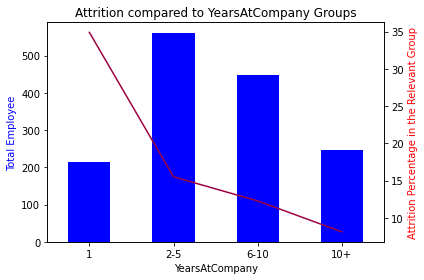

In [88]:
# Years at Company & Attrition Graph 
graph_df(x = 'YearsAtCompany')

# Observation
- Employees who have one year or less working experience in the company has the highest attrition percentage in its individual experience group (34.9% of attrition in the relevant group). Besides that, highest attrition number, which is 87 employees, is in the 2-5 years working experience at the company and that composes of the 36.7 % of all attrition in the company.

# Years in Current Role

In [89]:
# Labeling Years in Current Role Groups
table_df(x = 'YearsInCurrentRole')
bins = [0, 1, 4, 6, 7, 10, 18]
group_names = ['1', '2-4', '5-6', '7', '8-10', '10+']             
df2['YearsInCurrentRole'] = pd.cut(df2['YearsInCurrentRole'], bins, labels = group_names, 
                                   include_lowest = True)

In [90]:
# Years at Company & Attrition Table
table_df(x = 'YearsAtCompany')

,YearsAtCompany,Total Employee,Attrition Number,% of Attrition in the Relevant Group,% of Attrition in the Company
0,1,215,75,34.883721,31.645570
1,2-5,561,87,15.508021,36.708861
2,6-10,448,55,12.276786,23.206751
3,10+,246,20,8.130081,8.438819


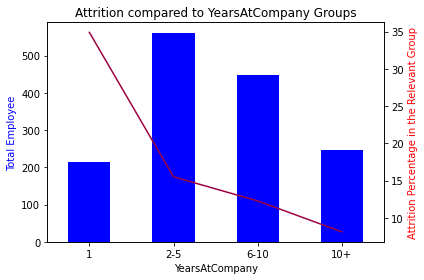

In [91]:
# Years in Current Role & Attrition Graph 
graph_df(x = 'YearsAtCompany')

# Observation
- Employees who don't fulfill their first year and in their first year in their current role are more likely to leave the company. That might be result of challenge or not satisfied with the current role.

- Employees who have 2-5 years' experience in that company compose of the maximum attrition percentage and number in the company.

- Besides that, after years in current role, employees are willing to leave the company. That might be result of looking for better opportunities in other companies.

# Years Since Last Promotion

In [92]:
# Labeling Years in Current Role Groups
table_df(x = 'YearsSinceLastPromotion')
bins = [0, 1, 2, 3, 4, 7, 8, 16]
group_names = ['0', '1', '2', '3', '4-6', '7', '8+']             
df2['YearsSinceLastPromotion'] = pd.cut(df2['YearsSinceLastPromotion'], bins, labels = group_names, 
                                        include_lowest = True, right = False)

In [93]:
# Years Since Last Promotion & Attrition Table
table_df(x = 'YearsSinceLastPromotion')

,YearsSinceLastPromotion,Total Employee,Attrition Number,% of Attrition in the Relevant Group,% of Attrition in the Company
0,0,581,110,18.932874,46.413502
1,1,357,49,13.725490,20.675105
2,2,159,27,16.981132,11.392405
3,3,52,9,17.307692,3.797468
4,4-6,138,13,9.420290,5.485232
5,7,76,16,21.052632,6.751055
6,8+,107,13,12.149533,5.485232


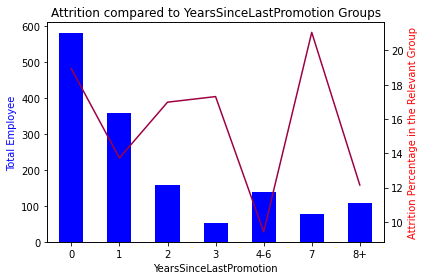

In [94]:
# Years Since Last Promotion & Attrition Graph
graph_df(x = 'YearsSinceLastPromotion')

# Observation
- Employees who don't fulfill his one year since the last promotion in the company are more likely to leave the company(46.4% of all attrition). And employees who have one and two years experience in the current company since the last promotion have the highest attrition number after the above group in the company respectively. 7 years since last promotion has the highest attrition in its individual group.

# Years with Current Manager

In [95]:
# Labeling Years with Current Manager Groups
table_df(x = 'YearsWithCurrManager')
bins = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 18]
group_names = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10+']             
df2['YearsWithCurrManager'] = pd.cut(df2['YearsWithCurrManager'], bins, labels = group_names, 
                                     include_lowest = True, right = False)

In [96]:
# Years with Current Manager & Attrition Table
table_df(x = 'YearsWithCurrManager')

,YearsWithCurrManager,Total Employee,Attrition Number,% of Attrition in the Relevant Group,% of Attrition in the Company
0,0,263,85,32.319392,35.864979
1,1,76,11,14.473684,4.641350
2,2,344,50,14.534884,21.097046
3,3,142,19,13.380282,8.016878
4,4,98,11,11.224490,4.641350
5,5,31,4,12.903226,1.687764
6,6,29,4,13.793103,1.687764
7,7,216,31,14.351852,13.080169
8,8,107,10,9.345794,4.219409
9,9,64,6,9.375000,2.531646


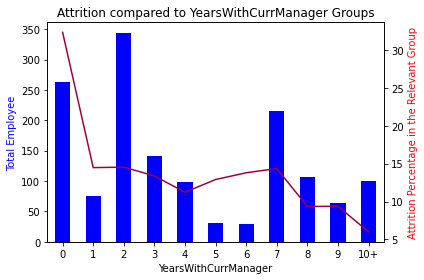

In [97]:
# Years with Current Manager & Attrition Graph
graph_df(x = 'YearsWithCurrManager')

# Observation
- Most of the employee quit the company before completing their first year with their current manager. Other group who leaves the company most is the ones who work two years with current manager.

# Other Features

I also checked the 'Employee Number', 'Daily Rate', 'Hourly Rate' and 'Monthly Rate' features as I did the in previous features of dataset. But there is nothing significant to comment or visualize about these features. For that reason, I didn't include them in my notebook.

# Feature/Variable Relationships:

- Here we will take a look at how variables related to each other. There are various methods/visualizations for this. I will use correlation matrix (heat map) for this purpose.

- Correlation means association - more precisely it is a measure of the extent to which two variables are related. 
- There are three possible results of a correlational study: a positive correlation, a negative correlation, and no correlation. 
- A positive correlation is a relationship between two variables in which both variables either increase or decrease at the same time. 
- An example would be height and weight. 
Taller people tend to be heavier. 
- A negative correlation is a relationship between two variables in which an increase in one variable is associated with a decrease in the other.
- An example would be height above sea level and temperature. 
- As you climb the mountain (increase in height) it gets colder (decrease in temperature).
- A zero correlation exists when there is no relationship between two variables. 
- For example, there is no relationship between the amount of tea drunk and level of intelligence.

## Checking Outlier

Age                            AxesSubplot(0.125,0.808774;0.227941x0.0712264)
Attrition                   AxesSubplot(0.398529,0.808774;0.227941x0.0712264)
DailyRate                   AxesSubplot(0.672059,0.808774;0.227941x0.0712264)
DistanceFromHome               AxesSubplot(0.125,0.723302;0.227941x0.0712264)
Education                   AxesSubplot(0.398529,0.723302;0.227941x0.0712264)
EmployeeCount               AxesSubplot(0.672059,0.723302;0.227941x0.0712264)
EmployeeNumber                  AxesSubplot(0.125,0.63783;0.227941x0.0712264)
EnvironmentSatisfaction      AxesSubplot(0.398529,0.63783;0.227941x0.0712264)
HourlyRate                   AxesSubplot(0.672059,0.63783;0.227941x0.0712264)
JobInvolvement                 AxesSubplot(0.125,0.552358;0.227941x0.0712264)
JobLevel                    AxesSubplot(0.398529,0.552358;0.227941x0.0712264)
JobSatisfaction             AxesSubplot(0.672059,0.552358;0.227941x0.0712264)
MonthlyIncome                  AxesSubplot(0.125,0.466887;0.2279

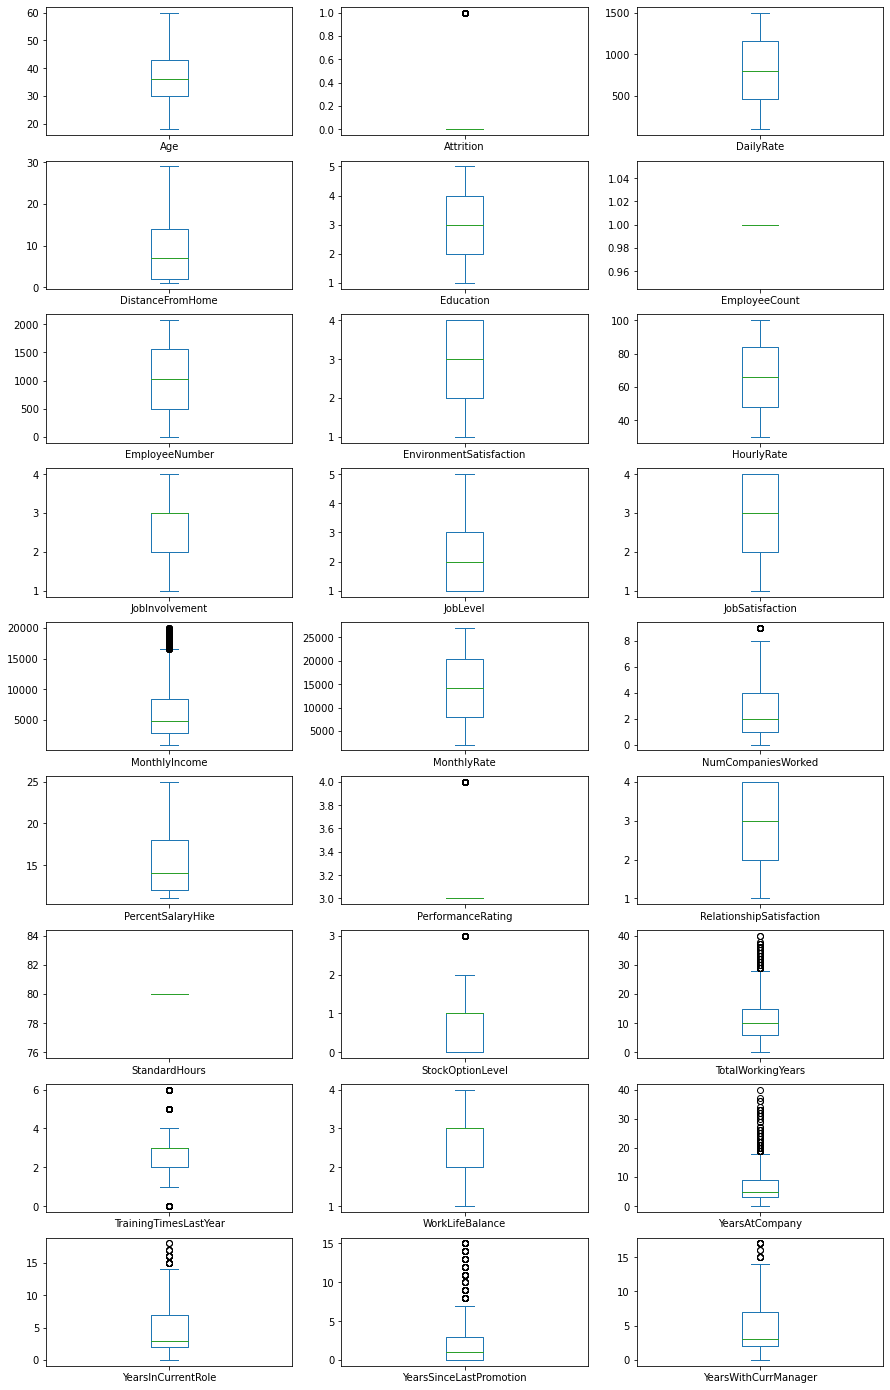

In [98]:
df.plot(kind='box',subplots=True,layout=(9,3),figsize=(15,25))

# Conclusion-
We have found some outliers in
- MonthlyIncome
- NewCompaniesWorked
- PerformanceRating
- TotalWorkingYears
- TrainingTimesLastYear
- YearsAtCompany
- YearsInCurrentRole
- YearsSinceLastPromotion
- YearsWithCurrManager

# To check the skweness

In [99]:
df.skew()

Age                         0.413286
Attrition                   1.844366
DailyRate                  -0.003519
DistanceFromHome            0.958118
Education                  -0.289681
EmployeeCount               0.000000
EmployeeNumber              0.016574
EnvironmentSatisfaction    -0.321654
HourlyRate                 -0.032311
JobInvolvement             -0.498419
JobLevel                    1.025401
JobSatisfaction            -0.329672
MonthlyIncome               1.369817
MonthlyRate                 0.018578
NumCompaniesWorked          1.026471
PercentSalaryHike           0.821128
PerformanceRating           1.921883
RelationshipSatisfaction   -0.302828
StandardHours               0.000000
StockOptionLevel            0.968980
TotalWorkingYears           1.117172
TrainingTimesLastYear       0.553124
WorkLifeBalance            -0.552480
YearsAtCompany              1.764529
YearsInCurrentRole          0.917363
YearsSinceLastPromotion     1.984290
YearsWithCurrManager        0.833451
d

In [100]:
outlier_col = ['MonthlyIncome', 'NumCompaniesWorked', 'PerformanceRating', 'TotalWorkingYears', 'TrainingTimesLastYear', 'YearsAtCompany', 'YearsInCurrentRole','YearsSinceLastPromotion',
'YearsWithCurrManager'] 

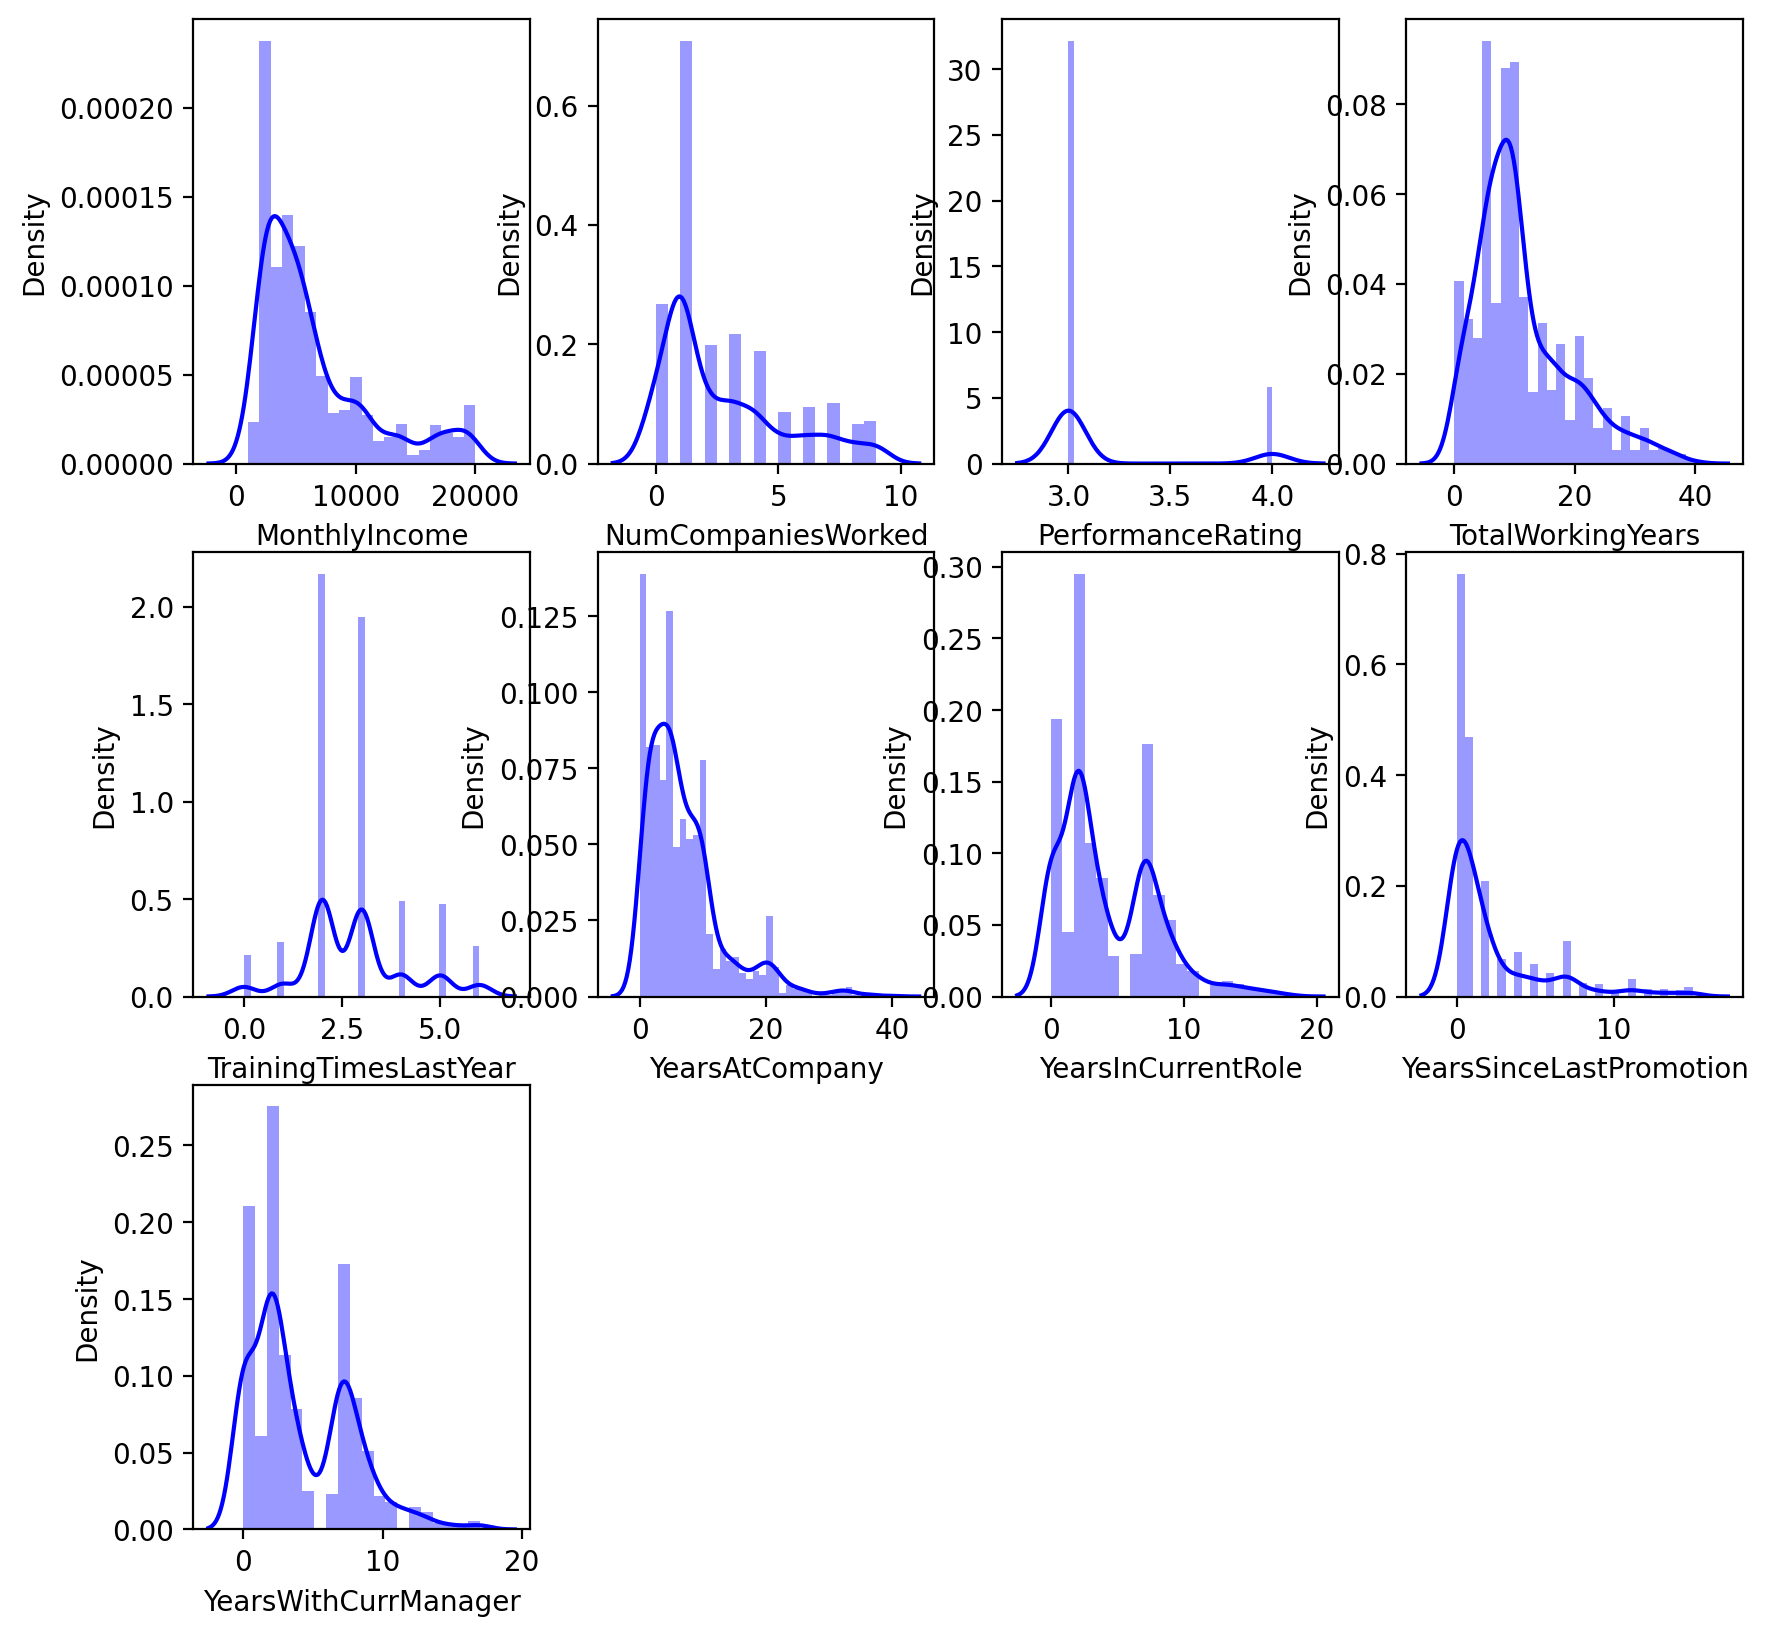

In [101]:
plt.figure(figsize=(10,10),dpi=200)
for i in enumerate(outlier_col):
    plt.subplot(3,4,i[0]+1)
    sns.distplot(df[i[1]],color='blue')

## Treating the Outlier

In [102]:
df2 = df.copy()

In [103]:
for feature in cols_with_outliers:
    IQR = df2[feature].quantile(0.75) - df2[feature].quantile(0.25)
    upper_bond = df2[feature].quantile(0.75) + (IQR * 1.5)
    lower_bond = df2[feature].quantile(0.25) - (IQR * 1.5)
    
    df2[feature] = np.where(df2[feature]>upper_bond,upper_bond,df2[feature])
    df2[feature] = np.where(df2[feature]<lower_bond,lower_bond,df2[feature])

NameError: name 'cols_with_outliers' is not defined

In [ ]:
df2.plot(kind='box',subplots=True,figsize=(15,25),layout=(7,4))
# plotting individual graph for better understanding of graph

# Conclusion -
After dropping, there are no outliers present in data. Check skewness of data. We can ignore parch, as these are not outliers

In [ ]:
plt.figure(figsize=(10,10),dpi=200)
for i in enumerate(outlier_col):
    plt.subplot(3,3,i[0]+1)
    sns.distplot(df2[i[1]],color='blue')

In [ ]:
df2.skew()

In [ ]:
df2.shape

In [ ]:
df2.drop('EmployeeCount',axis=1,inplace=True)
df2.drop('StandardHours',axis=1,inplace=True)
df2.drop('EmployeeNumber',axis=1,inplace=True)
df2.drop('Over18',axis=1,inplace=True)

In [ ]:
df2.shape

# Correlation Matrix


In [ ]:
corr_matrix = df2.corr()
f , ax = plt.subplots(figsize=(20,12))
sns.heatmap(corr_matrix, vmax=1, annot=True)

- Based on the fact which is given strength of correlation chart, we can identify the features which have strong, moderate, weak and zero correlations between each other. I will just outline the strong and moderate correlations here.

- Features which have strong correlations:
- 
- Percent Salary Hike and Performance Rating,

- Total Working Years, Monthly Income and Job Level,

- Years at Company, Years with Current Manager, and Years in Current Role,

- Features which have moderate correlations:

- Age has moderate correlation with Total Working Years, Monthly Income, and Job Level,

- Job Level has moderate correlation with Years at Company and Age,

- Total Working Years has moderate correlation with Years with Current Manager, Years Since Last Promotion, Years in Current Role, Years at Company, and Age,

- Years at Company has moderate correlation with Years Since Last Promotion, Total Working Years, Monthly Income, Job Level,
- 
Years in Current Role has moderate correlation with Years Since Last Promotion, Total Working Years,

- Years Since Last Promotion has moderate correlation with Years with Current Manager, Years in Current Role, Years at Company, Total Working Years,

- Years with Current Manager has moderate correlation with Years Since Last Promotion, Total Working Years.

In [104]:
df3=pd.DataFrame(data=df2)       # copying the dataframe
df3

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,0,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,1,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,0,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,0,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,0,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,3,Male,41,4,2,Laboratory Technician,4,Married,2571,12290,4,Y,No,17,3,3,80,1,17,3,3,5,2,0,3
1466,39,0,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,4,Male,42,2,3,Healthcare Representative,1,Married,9991,21457,4,Y,No,15,3,1,80,1,9,5,3,7,7,1,7
1467,27,0,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,2,Male,87,4,2,Manufacturing Director,2,Married,6142,5174,1,Y,Yes,20,4,2,80,1,6,0,3,6,2,0,3
1468,49,0,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,4,Male,63,2,2,Sales Executive,2,Married,5390,13243,2,Y,No,14,3,4,80,0,17,3,2,9,6,0,8


# Variable Encoding

In [105]:
le = LabelEncoder()

In [106]:
df3.describe(include="O")

,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,Over18,OverTime
count,1470,1470,1470,1470,1470,1470,1470,1470
unique,3,3,6,2,9,3,1,2
top,Travel_Rarely,Research & Development,Life Sciences,Male,Sales Executive,Married,Y,No
freq,1043,961,606,882,326,673,1470,1054


In [107]:
df3['BusinessTravel']=le.fit_transform(df3['BusinessTravel'])
df3.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,2,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,0,1,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,1,2,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,0,1,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,0,2,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


In [108]:
df3['Department']=le.fit_transform(df3['Department'])
df3.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,2,1102,2,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,0,1,279,1,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,1,2,1373,1,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,0,1,1392,1,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,0,2,591,1,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


In [109]:
df3['EducationField']=le.fit_transform(df3['EducationField'])
df3.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,2,1102,2,1,2,1,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,0,1,279,1,8,1,1,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,1,2,1373,1,2,2,4,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,0,1,1392,1,3,4,1,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,0,2,591,1,2,1,3,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


In [110]:
df3['Gender']=le.fit_transform(df3['Gender'])
df3.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,2,1102,2,1,2,1,1,1,2,0,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,0,1,279,1,8,1,1,1,2,3,1,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,1,2,1373,1,2,2,4,1,4,4,1,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,0,1,1392,1,3,4,1,1,5,4,0,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,0,2,591,1,2,1,3,1,7,1,1,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


In [111]:
df3['JobRole']=le.fit_transform(df3['JobRole'])
df3.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,2,1102,2,1,2,1,1,1,2,0,94,3,2,7,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,0,1,279,1,8,1,1,1,2,3,1,61,2,2,6,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,1,2,1373,1,2,2,4,1,4,4,1,92,2,1,2,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,0,1,1392,1,3,4,1,1,5,4,0,56,3,1,6,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,0,2,591,1,2,1,3,1,7,1,1,40,3,1,2,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


In [112]:
df3['MaritalStatus']=le.fit_transform(df3['MaritalStatus'])
df3.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,2,1102,2,1,2,1,1,1,2,0,94,3,2,7,4,2,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,0,1,279,1,8,1,1,1,2,3,1,61,2,2,6,2,1,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,1,2,1373,1,2,2,4,1,4,4,1,92,2,1,2,3,2,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,0,1,1392,1,3,4,1,1,5,4,0,56,3,1,6,3,1,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,0,2,591,1,2,1,3,1,7,1,1,40,3,1,2,2,1,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


In [113]:
df3['OverTime']=le.fit_transform(df3['OverTime'])
df3.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,2,1102,2,1,2,1,1,1,2,0,94,3,2,7,4,2,5993,19479,8,Y,1,11,3,1,80,0,8,0,1,6,4,0,5
1,49,0,1,279,1,8,1,1,1,2,3,1,61,2,2,6,2,1,5130,24907,1,Y,0,23,4,4,80,1,10,3,3,10,7,1,7
2,37,1,2,1373,1,2,2,4,1,4,4,1,92,2,1,2,3,2,2090,2396,6,Y,1,15,3,2,80,0,7,3,3,0,0,0,0
3,33,0,1,1392,1,3,4,1,1,5,4,0,56,3,1,6,3,1,2909,23159,1,Y,1,11,3,3,80,0,8,3,3,8,7,3,0
4,27,0,2,591,1,2,1,3,1,7,1,1,40,3,1,2,2,1,3468,16632,9,Y,0,12,3,4,80,1,6,3,3,2,2,2,2


In [114]:
df3.corr()["Attrition"].sort_values()

TotalWorkingYears          -0.171063
JobLevel                   -0.169105
YearsInCurrentRole         -0.160545
MonthlyIncome              -0.159840
Age                        -0.159205
YearsWithCurrManager       -0.156199
StockOptionLevel           -0.137145
YearsAtCompany             -0.134392
JobInvolvement             -0.130016
JobSatisfaction            -0.103481
EnvironmentSatisfaction    -0.103369
WorkLifeBalance            -0.063939
TrainingTimesLastYear      -0.059478
DailyRate                  -0.056652
RelationshipSatisfaction   -0.045872
YearsSinceLastPromotion    -0.033019
Education                  -0.031373
PercentSalaryHike          -0.013478
EmployeeNumber             -0.010577
HourlyRate                 -0.006846
BusinessTravel              0.000074
PerformanceRating           0.002889
MonthlyRate                 0.015170
EducationField              0.026846
Gender                      0.029453
NumCompaniesWorked          0.043494
Department                  0.063991
J

In [115]:
x = df3[{'Age', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
       'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'OverTime',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'}]

In [116]:
y = df3[{'Attrition'}]

In [117]:
x

,WorkLifeBalance,YearsSinceLastPromotion,BusinessTravel,MaritalStatus,NumCompaniesWorked,RelationshipSatisfaction,EnvironmentSatisfaction,JobLevel,Education,JobSatisfaction,OverTime,Gender,JobRole,DailyRate,PerformanceRating,MonthlyRate,StockOptionLevel,PercentSalaryHike,MonthlyIncome,DistanceFromHome,TotalWorkingYears,JobInvolvement,Age,TrainingTimesLastYear,YearsAtCompany,Department,EducationField,YearsWithCurrManager,YearsInCurrentRole,HourlyRate
0,1,0,2,2,8,1,2,2,2,4,1,0,7,1102,3,19479,0,11,5993,1,8,3,41,0,6,2,1,5,4,94
1,3,1,1,1,1,4,3,2,1,2,0,1,6,279,4,24907,1,23,5130,8,10,2,49,3,10,1,1,7,7,61
2,3,0,2,2,6,2,4,1,2,3,1,1,2,1373,3,2396,0,15,2090,2,7,2,37,3,0,1,4,0,0,92
3,3,3,1,1,1,3,4,1,4,3,1,0,6,1392,3,23159,0,11,2909,3,8,3,33,3,8,1,1,0,7,56
4,3,2,2,1,9,4,1,1,1,2,0,1,2,591,3,16632,1,12,3468,2,6,3,27,3,2,1,3,2,2,40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,3,0,1,1,4,3,3,2,2,4,0,1,2,884,3,12290,1,17,2571,23,17,4,36,3,5,1,3,3,2,41
1466,3,1,2,1,4,1,4,3,1,1,0,1,0,613,3,21457,1,15,9991,6,9,2,39,5,7,1,3,7,7,42
1467,3,0,2,1,1,2,2,2,3,2,1,1,4,155,4,5174,1,20,6142,4,6,4,27,0,6,1,1,3,2,87
1468,2,0,1,1,2,4,4,2,3,2,0,1,7,1023,3,13243,0,14,5390,2,17,2,49,3,9,2,3,8,6,63


In [118]:
y

,Attrition
0,1
1,0
2,1
3,0
4,0
...,...
1465,0
1466,0
1467,0
1468,0


In [119]:
df3.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

# Variance Inflation Factor

In [120]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [121]:
def calc_vif(x1):
    vif=pd.DataFrame()
    vif["variables"]=x1.columns
    vif["VIF FACTOR"]=[variance_inflation_factor(x1.values,i) for i in range(x1.shape[1])]
    return(vif)

In [122]:
x.dtypes

WorkLifeBalance             int64
YearsSinceLastPromotion     int64
BusinessTravel              int32
MaritalStatus               int32
NumCompaniesWorked          int64
RelationshipSatisfaction    int64
EnvironmentSatisfaction     int64
JobLevel                    int64
Education                   int64
JobSatisfaction             int64
OverTime                    int32
Gender                      int32
JobRole                     int32
DailyRate                   int64
PerformanceRating           int64
MonthlyRate                 int64
StockOptionLevel            int64
PercentSalaryHike           int64
MonthlyIncome               int64
DistanceFromHome            int64
TotalWorkingYears           int64
JobInvolvement              int64
Age                         int64
TrainingTimesLastYear       int64
YearsAtCompany              int64
Department                  int32
EducationField              int32
YearsWithCurrManager        int64
YearsInCurrentRole          int64
HourlyRate    

In [123]:
calc_vif(x)

,variables,VIF FACTOR
0,WorkLifeBalance,15.595209
1,YearsSinceLastPromotion,2.451288
2,BusinessTravel,6.744873
3,MaritalStatus,5.787900
4,NumCompaniesWorked,2.726026
5,RelationshipSatisfaction,7.271234
6,EnvironmentSatisfaction,7.109660
7,JobLevel,52.565598
8,Education,9.453687
9,JobSatisfaction,7.023244


<AxesSubplot:>

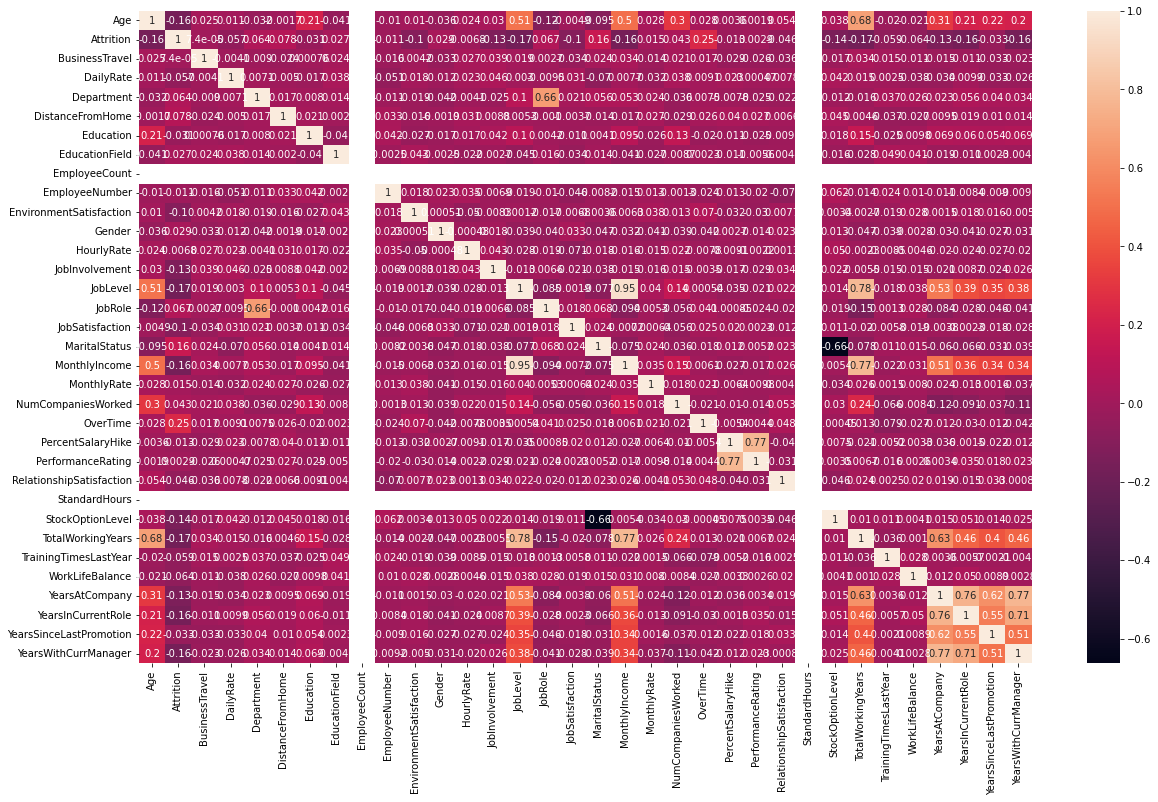

In [124]:
corr_matrix = df3.corr()
f , ax = plt.subplots(figsize=(20,12))
sns.heatmap(corr_matrix, vmax=1, annot=True)

# StandardScaler

In [125]:
sc=StandardScaler()
x1=sc.fit_transform(x)
x1

array([[-2.49382042, -0.67914568,  0.59004834, ...,  0.24583399,
        -0.0632959 ,  1.38313827],
       [ 0.33809616, -0.36871529, -0.91319439, ...,  0.80654148,
         0.76499762, -0.24067677],
       [ 0.33809616, -0.67914568,  0.59004834, ..., -1.15593471,
        -1.16768726,  1.28472523],
       ...,
       [ 0.33809616, -0.67914568,  0.59004834, ..., -0.31487349,
        -0.61549158,  1.03869265],
       [-1.07786213, -0.67914568, -0.91319439, ...,  1.08689522,
         0.48889978, -0.14226374],
       [ 1.75405446, -0.36871529,  0.59004834, ..., -0.59522723,
        -0.33939374,  0.79266007]])

since the different columns were out of scale we performed scaling operation on all the independant variables columns to bring it into the same scale.

We used Standard Scaler method to ensure all my independant variables columns have been standardized.

In [126]:
x = pd.DataFrame(x1,columns=x.columns)

In [127]:
x

,WorkLifeBalance,YearsSinceLastPromotion,BusinessTravel,MaritalStatus,NumCompaniesWorked,RelationshipSatisfaction,EnvironmentSatisfaction,JobLevel,Education,JobSatisfaction,OverTime,Gender,JobRole,DailyRate,PerformanceRating,MonthlyRate,StockOptionLevel,PercentSalaryHike,MonthlyIncome,DistanceFromHome,TotalWorkingYears,JobInvolvement,Age,TrainingTimesLastYear,YearsAtCompany,Department,EducationField,YearsWithCurrManager,YearsInCurrentRole,HourlyRate
0,-2.493820,-0.679146,0.590048,1.236820,2.125136,-1.584178,-0.660531,-0.057788,-0.891688,1.153254,1.591746,-1.224745,1.032716,0.742527,-0.426230,0.726020,-0.932014,-1.150554,-0.108350,-1.010909,-0.421642,0.379672,0.446350,-2.171982,-0.164613,1.401512,-0.937414,0.245834,-0.063296,1.383138
1,0.338096,-0.368715,-0.913194,-0.133282,-0.678049,1.191438,0.254625,-0.057788,-1.868426,-0.660853,-0.628241,0.816497,0.626374,-1.297775,2.346151,1.488876,0.241988,2.129306,-0.291719,-0.147150,-0.164511,-1.026167,1.322365,0.155707,0.488508,-0.493817,-0.937414,0.806541,0.764998,-0.240677
2,0.338096,-0.679146,0.590048,1.236820,1.324226,-0.658973,1.169781,-0.961486,-0.891688,0.246200,1.591746,0.816497,-0.998992,1.414363,-0.426230,-1.674841,-0.932014,-0.057267,-0.937654,-0.887515,-0.550208,-1.026167,0.008343,0.155707,-1.144294,-0.493817,1.316673,-1.155935,-1.167687,1.284725
3,0.338096,0.252146,-0.913194,-0.133282,-0.678049,0.266233,1.169781,-0.961486,1.061787,0.246200,1.591746,-1.224745,0.626374,1.461466,-0.426230,1.243211,-0.932014,-1.150554,-0.763634,-0.764121,-0.421642,0.379672,-0.429664,0.155707,0.161947,-0.493817,-0.937414,-1.155935,0.764998,-0.486709
4,0.338096,-0.058285,0.590048,-0.133282,2.525591,1.191438,-1.575686,-0.961486,-1.868426,-0.660853,-0.628241,0.816497,-0.998992,-0.524295,-0.426230,0.325900,0.241988,-0.877232,-0.644858,-0.887515,-0.678774,0.379672,-1.086676,0.155707,-0.817734,-0.493817,0.565311,-0.595227,-0.615492,-1.274014
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,0.338096,-0.679146,-0.913194,-0.133282,0.523316,0.266233,0.254625,-0.057788,-0.891688,1.153254,-0.628241,0.816497,-0.998992,0.202082,-0.426230,-0.284329,0.241988,0.489376,-0.835451,1.703764,0.735447,1.785511,-0.101159,0.155707,-0.327893,-0.493817,0.565311,-0.314873,-0.615492,-1.224807
1466,0.338096,-0.368715,0.590048,-0.133282,0.523316,-1.584178,1.169781,0.845911,-1.868426,-1.567907,-0.628241,0.816497,-1.811675,-0.469754,-0.426230,1.004010,0.241988,-0.057267,0.741140,-0.393938,-0.293077,-1.026167,0.227347,1.707500,-0.001333,-0.493817,0.565311,0.806541,0.764998,-1.175601
1467,0.338096,-0.679146,0.590048,-0.133282,-0.678049,-0.658973,-0.660531,-0.057788,0.085049,-0.660853,1.591746,0.816497,-0.186309,-1.605183,2.346151,-1.284418,0.241988,1.309341,-0.076690,-0.640727,-0.678774,1.785511,-1.086676,-2.171982,-0.164613,-0.493817,-0.937414,-0.314873,-0.615492,1.038693
1468,-1.077862,-0.679146,-0.913194,-0.133282,-0.277594,1.191438,1.169781,-0.057788,0.085049,-0.660853,-0.628241,0.816497,1.032716,0.546677,-0.426230,-0.150393,-0.932014,-0.330589,-0.236474,-0.887515,0.735447,-1.026167,1.322365,0.155707,0.325228,1.401512,0.565311,1.086895,0.488900,-0.142264


# Data is ready for Machine Learning Models

In [128]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=43)

In [129]:
dtc=DecisionTreeClassifier()
rfc=RandomForestClassifier()
lg=LogisticRegression()
knc=KNeighborsClassifier()
sgc=SGDClassifier()

In [130]:
seed=7
#prepare models
models=[]
models.append(('DecisionTreeClassifier',dtc))
models.append(('RandomForestClassifier',rfc))
models.append(('KNeighborsClassifier',knc))
models.append(('SGDClassifier',sgc))
models.append(('LogisticRegression',lg))

************** DecisionTreeClassifier ***********


DecisionTreeClassifier()


accuracy score 0.7074829931972789
Cross-val-score= 0.792539475590323


roc_auc_score 0.5428253615127919


              precision    recall  f1-score   support

           0       0.81      0.83      0.82       232
           1       0.29      0.26      0.27        62

    accuracy                           0.71       294
   macro avg       0.55      0.54      0.54       294
weighted avg       0.70      0.71      0.70       294



[[192  40]
 [ 46  16]]


AxesSubplot(0.125,0.808774;0.62x0.0712264)


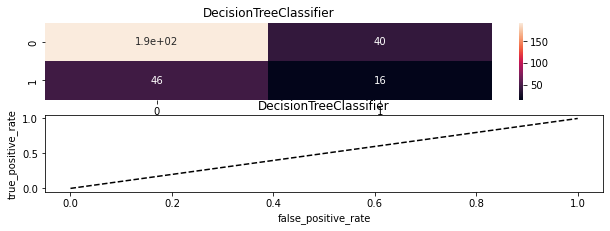

************** RandomForestClassifier ***********


RandomForestClassifier()


accuracy score 0.8095238095238095
Cross-val-score= 0.8647906707228741


roc_auc_score 0.5602057842046718


              precision    recall  f1-score   support

           0       0.81      0.99      0.89       232
           1       0.80      0.13      0.22        62

    accuracy                           0.81       294
   macro avg       0.80      0.56      0.56       294
weighted avg       0.81      0.81      0.75       294



[[230   2]
 [ 54   8]]


AxesSubplot(0.125,0.808774;0.62x0.0712264)


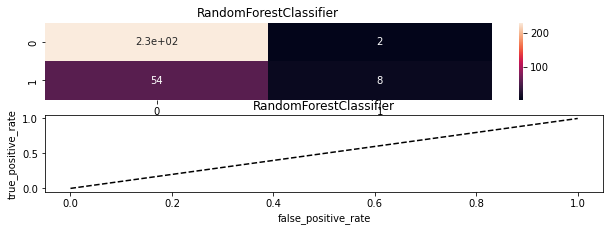

************** KNeighborsClassifier ***********


KNeighborsClassifier()


accuracy score 0.7959183673469388
Cross-val-score= 0.8597131681877445


roc_auc_score 0.5279477196885428


              precision    recall  f1-score   support

           0       0.80      0.99      0.88       232
           1       0.67      0.06      0.12        62

    accuracy                           0.80       294
   macro avg       0.73      0.53      0.50       294
weighted avg       0.77      0.80      0.72       294



[[230   2]
 [ 58   4]]


AxesSubplot(0.125,0.808774;0.62x0.0712264)


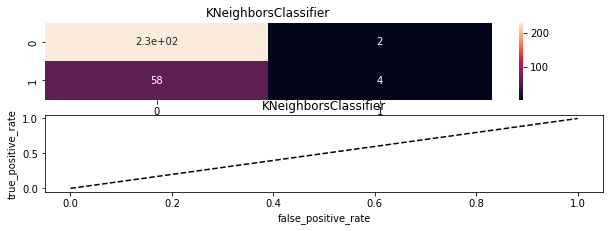

************** SGDClassifier ***********


SGDClassifier()


accuracy score 0.8129251700680272
Cross-val-score= 0.8409676952049832


roc_auc_score 0.6510011123470523


              precision    recall  f1-score   support

           0       0.85      0.93      0.89       232
           1       0.59      0.37      0.46        62

    accuracy                           0.81       294
   macro avg       0.72      0.65      0.67       294
weighted avg       0.79      0.81      0.80       294



[[216  16]
 [ 39  23]]


AxesSubplot(0.125,0.808774;0.62x0.0712264)


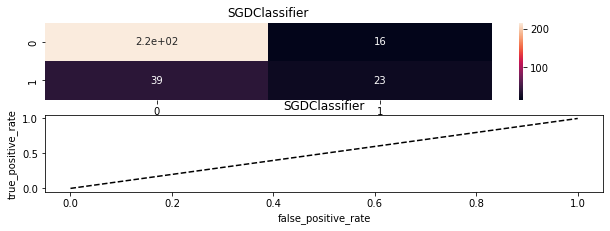

************** LogisticRegression ***********


LogisticRegression()


accuracy score 0.8435374149659864
Cross-val-score= 0.8767202665507752


roc_auc_score 0.6585789766407119


              precision    recall  f1-score   support

           0       0.85      0.98      0.91       232
           1       0.81      0.34      0.48        62

    accuracy                           0.84       294
   macro avg       0.83      0.66      0.69       294
weighted avg       0.84      0.84      0.82       294



[[227   5]
 [ 41  21]]


AxesSubplot(0.125,0.808774;0.62x0.0712264)


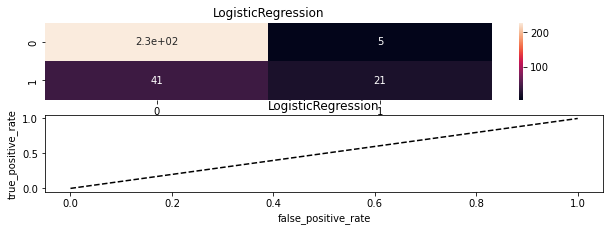

In [131]:
#evaluate each model in turn
Model=[]
cvs=[]
score=[]
rocscore=[]
for name,model in models:
    print('**************',name,'***********')
    print('\n')
    Model.append(name)
    model.fit(x_train,y_train)
    print(model)
    pred=model.predict(x_test)
    print('\n')
    acc=accuracy_score(y_test,pred)
    print('accuracy score',acc)
    score.append(acc*100)
    kfold=model_selection.KFold(n_splits=10)
    # ---------------------------------------------------------------------------------------------------------
    
    cv=model_selection.cross_val_score(model,x_train,y_train,cv=10,scoring='accuracy').mean()
    print('Cross-val-score=',cv)
    cvs.append(cv*100)
    print('\n')
    # ---------------------------------------------------------------------------------------------------------
        
    false_positive_rate,true_positive_rate,thresholds=roc_curve(y_test,pred, pos_label=2)
    roc_auc=roc_auc_score(y_test,pred)
    print('roc_auc_score',roc_auc)
    rocscore.append(roc_auc*100)
    print('\n')
    print(classification_report(y_test,pred))
    print('\n')
    cm=confusion_matrix(y_test,pred)
    print(cm)
    print('\n')
    plt.figure(figsize=(10,15))
    plt.subplot(911)
    plt.title(name)
    print(sns.heatmap(cm,annot=True))
    plt.subplot(912)
    plt.title(name)
    
    plt.plot(false_positive_rate,true_positive_rate,label='AUC'%roc_auc)
    plt.plot([0,1],[0,1],'k--')
    plt.xlabel('false_positive_rate')
    plt.ylabel('true_positive_rate')
    plt.show()

 ------------------------ Results with Random State 0 ------------------------
                        Model        cvs      score   rocscore
0      DecisionTreeClassifier  77.300449  74.829932  57.959184
1      RandomForestClassifier  85.966971  84.693878  57.346939
2        KNeighborsClassifier  83.928002  83.333333  53.265306
3               SGDClassifier  82.144720  84.013605  65.918367
4          LogisticRegression  86.649283  88.095238  68.367347
5                   LinearSVC  86.222657  87.074830  64.489796
6  GradientBoostingClassifier  86.223381  85.034014  63.265306
7                  GaussianNB  77.209184  78.911565  73.469388
 ------------------------ Results with Random State 1 ------------------------
                        Model        cvs      score   rocscore
0      DecisionTreeClassifier  79.255396  76.190476  57.860900
1      RandomForestClassifier  85.630885  81.972789  56.260959
2        KNeighborsClassifier  85.118789  80.612245  53.462887
3               SGDClas

 ------------------------ Results with Random State 57 ------------------------
                        Model        cvs      score   rocscore
0      DecisionTreeClassifier  77.042590  80.952381  61.594488
1      RandomForestClassifier  85.374475  86.734694  56.515748
2        KNeighborsClassifier  83.249312  85.714286  54.872047
3               SGDClassifier  83.495582  85.034014  73.435039
4          LogisticRegression  85.884398  88.435374  65.925197
5                   LinearSVC  86.056063  88.775510  65.068898
6  GradientBoostingClassifier  86.306678  87.074830  60.925197
7                  GaussianNB  80.266551  77.891156  72.460630
 ------------------------ Results with Random State 59 ------------------------
                        Model        cvs      score   rocscore
0      DecisionTreeClassifier  77.978415  76.530612  59.528401
1      RandomForestClassifier  85.289005  86.054422  56.320126
2        KNeighborsClassifier  85.031870  85.374150  55.031557
3               SGDCl

 ------------------------ Results with Random State 109 ------------------------
                        Model        cvs      score   rocscore
0      DecisionTreeClassifier  79.415472  75.850340  60.254351
1      RandomForestClassifier  85.969144  85.714286  56.974565
2        KNeighborsClassifier  84.437926  84.353741  56.171352
3               SGDClassifier  82.046936  85.374150  57.684070
4          LogisticRegression  86.647834  86.394558  64.658635
5                   LinearSVC  86.734029  86.054422  61.726908
6  GradientBoostingClassifier  86.816601  87.755102  65.461847
7                  GaussianNB  80.265102  79.251701  71.365462


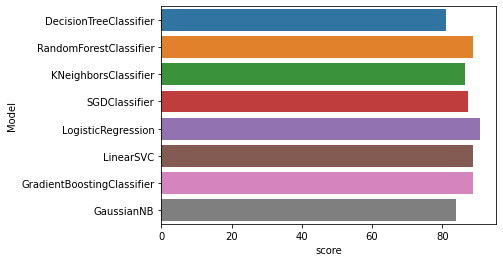

In [132]:
for i in [0, 1, 5, 7, 9, 14, 18, 19, 23, 27, 35, 40, 47, 57, 59, 62, 75, 81, 87, 89, 91, 93, 96, 99, 101, 107, 109]:
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=i)
    
    sc=StandardScaler()
    x_train=sc.fit_transform(x_train)
    x_test=sc.fit_transform(x_test)
    
    
    dtc=DecisionTreeClassifier()
    rfc=RandomForestClassifier()
    lg=LogisticRegression()
    knc=KNeighborsClassifier()
    sgc=SGDClassifier()
    svc = LinearSVC()
    gbc = GradientBoostingClassifier()
    gnb = GaussianNB()
    
    
    seed=7
    #prepare models
    models=[]
    models.append(('DecisionTreeClassifier',dtc))
    models.append(('RandomForestClassifier',rfc))
    models.append(('KNeighborsClassifier',knc))
    models.append(('SGDClassifier',sgc))
    models.append(('LogisticRegression',lg))
    models.append(('LinearSVC', svc))
    models.append(('GradientBoostingClassifier', gbc))
    models.append(('GaussianNB', gnb))
    
    
    
    #evaluate each model in turn ----------------------------------------------------------------------------------------
    Model=[]
    cvs=[]
    score=[]
    rocscore=[]
    for name,model in models:
        # print('**************',name,'***********')
        # print('\n')
        Model.append(name)
        model.fit(x_train,y_train)
        # print(model)
        pred=model.predict(x_test)
        # print('\n')
        acc=accuracy_score(y_test,pred)
        # print('accuracy score',acc)
        score.append(acc*100)
        kfold=model_selection.KFold(n_splits=10)
        # ---------------------------------------------------------------------------------------------------------

        cv=model_selection.cross_val_score(model,x_train,y_train,cv=10,scoring='accuracy').mean()
        # print('Cross-val-score=',cv)
        cvs.append(cv*100)
        # print('\n')
        # ---------------------------------------------------------------------------------------------------------

        false_positive_rate,true_positive_rate,thresholds=roc_curve(y_test,pred, pos_label=2)
        roc_auc=roc_auc_score(y_test,pred)
        # print('roc_auc_score',roc_auc)
        rocscore.append(roc_auc*100)
        # print('\n')
        # print(classification_report(y_test,pred))
        # print('\n')
        cm=confusion_matrix(y_test,pred)
        # print(cm)
        # print('\n')
        # plt.figure(figsize=(10,15))
        # plt.subplot(911)
        # plt.title(name)
        # print(sns.heatmap(cm,annot=True))
        # plt.subplot(912)
        # plt.title(name)

        # plt.plot(false_positive_rate,true_positive_rate,label='AUC'%roc_auc)
        # plt.plot([0,1],[0,1],'k--')
        # plt.xlabel('false_positive_rate')
        # plt.ylabel('true_positive_rate')
        # plt.show()

        
    result=pd.DataFrame({'Model':Model, 'cvs' :cvs, 'score' :score, 'rocscore' :rocscore}, columns=['Model', 'cvs','score','rocscore'])
    print(f'\033[1m ------------------------ Results with Random State {i} ------------------------')
    print(result)
    sns.barplot(y='Model',x='score',data=result)
    result['score']

<AxesSubplot:xlabel='score', ylabel='Model'>

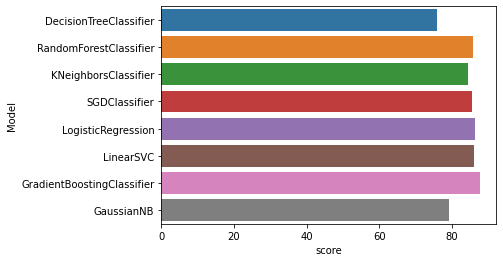

In [133]:
sns.barplot(y='Model',x='score',data=result)


# Parameter Tuning

In [134]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=1)

## 1. GradientBoostingClassifier

In [135]:
For random state 19, we have high accuracy score

SyntaxError: invalid syntax (Temp/ipykernel_12280/1190114856.py, line 1)

In [ ]:
clf_gb=GridSearchCV(estimator=GradientBoostingClassifier(),cv=10,param_grid=dict({'n_estimators':[500]}))
clf_gb.fit(x_train,y_train)

In [ ]:
clf_gb.best_score_

In [ ]:
clf_gb.best_params_

In [ ]:
clf_gb_df = pd.DataFrame(clf_gb.cv_results_)
clf_gb_df

In [ ]:
pred=clf_gb.predict(x_test)
print(f'Accuracy of GradientBoostingClassifier is {round(accuracy_score(pred,y_test)*100,4)}')

## 2. Logistic Regression

In [ ]:
params_dict={'C':[0.001, 0.01, 0.1, 1, 10, 100, 1000],'penalty':['l1','l2']}
clf_lr=GridSearchCV(estimator=lg,param_grid=params_dict,scoring='accuracy',cv=10)
clf_lr.fit(x_train,y_train)

In [ ]:
clf_lr.best_params_

In [ ]:
clf_lr.best_score_ # the best accuracy obtained by Grid search on the train set.

In [ ]:
clf_lr_df = pd.DataFrame(clf_lr.cv_results_)
clf_lr_df

In [ ]:
pred=clf_lr.predict(x_test)
accuracy_score(pred,y_test)

## 3. KNN

In [ ]:
l=[i+1 for i in range(50)]
params_dict={'n_neighbors':l,'n_jobs':[-1]}
clf_knn=GridSearchCV(estimator=KNeighborsClassifier(),param_grid=params_dict,scoring='accuracy',cv=10)
clf_knn.fit(x_train,y_train)

In [ ]:
clf_knn.best_score_

In [ ]:
clf_knn.best_params_

In [ ]:
clf_knn_df = pd.DataFrame(clf_knn.cv_results_)
clf_knn_df

In [ ]:
pred=clf_knn.predict(x_test)
accuracy_score(pred,y_test) 

## 4. Random Forcast

In [ ]:
params_dict={'n_estimators':[500],'max_features':['auto','sqrt','log2']}
clf_rf=GridSearchCV(estimator=RandomForestClassifier(n_jobs=-1),param_grid=params_dict,scoring='accuracy',cv=10)
clf_rf.fit(x_train,y_train)

In [ ]:
clf_rf.best_score_

In [ ]:
clf_rf.best_params_

In [ ]:
clf_rf_df = pd.DataFrame(clf_rf.cv_results_)
clf_rf_df

In [ ]:
pred=clf_rf.predict(x_test)
print(round(accuracy_score(pred,y_test), 3) * 100, '%')   # actual accuarcy on our test set.

## 5. Gradient Boosting

In [ ]:
clf_gb=GridSearchCV(estimator=GradientBoostingClassifier(),cv=10,param_grid=dict({'n_estimators':[500]}))
clf_gb.fit(x_train,y_train)

In [ ]:
clf_gb.best_score_

In [ ]:
clf_gb.best_params_

In [ ]:
clf_gb_df = pd.DataFrame(clf_gb.cv_results_)
clf_gb_df

In [ ]:
pred=clf_gb.predict(x_test)
accuracy_score(pred,y_test)
print(pred)

## 6. SVM

In [ ]:
params_dict={'C':[0.001,0.01,0.1,1,10,100],'gamma':[0.001,0.01,0.1,1,10,100],'kernel':['linear','rbf']}
clf=GridSearchCV(estimator=SVC(),param_grid=params_dict,scoring='accuracy',cv=10)
clf.fit(x_train,y_train)

In [ ]:
clf.best_score_

In [ ]:
clf.best_params_

In [ ]:
# now tuning finally around these values of C and gamma and the kernel for further increasing the accuracy.
params_dict={'C':[0.90,0.92,0.96,0.98,1.0,1.2,1.5],'gamma':[0.90,0.92,0.96,0.98,1.0,1.2,1.5],'kernel':['linear','rbf']}
clf_svm=GridSearchCV(estimator=SVC(),param_grid=params_dict,scoring='accuracy',cv=10)
clf_svm.fit(x_train,y_train)

In [ ]:
clf_svm.best_score_

In [ ]:
clf_svm.best_params_

In [ ]:
clf_svm_df = pd.DataFrame(clf_svm.cv_results_)
clf_svm_df

In [ ]:
pred=clf_svm.predict(x_test)
accuracy_score(pred,y_test)   # actual accuarcy on our test set.

## Creting Model For Predicting Attrition rate 

In [ ]:
# Save File
import pickle
file = 'titanic_survival_prediction'
#save file
save = pickle.dump(clf_svm,open(file,'wb'))